# Default of Credit Card Clients Project

## Project Pipeline
A data science pipeline for the project.  

1. **Introduction & Problem Statement :** A brief introduction of the dataset and modeling problem - Binary classification problem.  
    *Note : Classification vs Regression; Binary vs Multi-class*  
    
2. **Dataset information :** Understand the data and its features - Size of dataset, Number of features, Type of each features. 
3. **Data Preprocessing :** data preparation, data transformation, feature engineering. 
4. **Exploratory Data Analysis (EDA) :** Summary statistics, data visualizations, assessment metrics (e.g. imbalanced data)  
    *Note : oversampling or stratified sampling might be needed to balance out the data.* 

5. **Train-Test Split :** Split the data into train and test datasets with ratio of train : test = 3 : 1. Avoid leaking of information from train to test. Not touching the test data until the prediction phase (final stage of modeling).
6. **Feature Selection :** Correlation plot, forward/backward stepwise feature selection 
7. **Model Selection :** Fit training dataset to model and predict on test dataset. Models to consider include : baseline model, Linear models (LogisticRegression), Non-linear models (SVM, RandomForest, Boosting), Deep learning model (Neural Network)  
    *Note : Consider having hyperparameter tuning with GridSearch in modeling phase.*  
    *Note : Check for overfitting and underfitting.*  
    
8. **Model Evaluation :** Performance evaluation of each model with evaluation metrics - Confusion matrix, Classification Accuracy (balanced data) / Average Class Accuracy (if imbalanced data), Precision, Recall, F1-score, ROC curve & AUC, K-S statistics, Gain and Lift 
9. **Conclusion & Further Improvements :** Summary of results (highlights of each step in pipeline), discussion of techniques used, insights and limitations of model / project 
10. **References** 

## Import Libraries

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

import scikitplot as skplt
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## 1. Introduction

## 2. Dataset Information

**Source of Dataset**  
UCI Machine Learning Repository : [Default of Credit Card Clients Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)  
It contains payment information of 30,000 credit card holders obtained from a bank in Taiwan. Each data sample is described by 23 feature attributes (columns B to X). The target feature (column Y) to be predicted is binary valued 0 (= not default) or 1 (= default).

**Dataset Information**  
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

**`ID` :** ID of each client  
**`LIMIT_BAL` :** Amount of given credit in NT dollars (includes individual and family/supplementary credit  
**`SEX` :** Gender (1=male, 2=female)  
**`EDUCATION` :** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  
**`MARRIAGE` :** Marital status (1=married, 2=single, 3=others)  
**`AGE` :** Age in years  
**`PAY_0` :** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)  
**`PAY_2` :** Repayment status in August, 2005 (scale same as above)  
**`PAY_3` :** Repayment status in July, 2005 (scale same as above)  
**`PAY_4` :** Repayment status in June, 2005 (scale same as above)  
**`PAY_5` :** Repayment status in May, 2005 (scale same as above)  
**`PAY_6` :** Repayment status in April, 2005 (scale same as above)  
**`BILL_AMT1` :** Amount of bill statement in September, 2005 (NT dollar)  
**`BILL_AMT2` :** Amount of bill statement in August, 2005 (NT dollar)  
**`BILL_AMT3` :** Amount of bill statement in July, 2005 (NT dollar)  
**`BILL_AMT4` :** Amount of bill statement in June, 2005 (NT dollar)  
**`BILL_AMT5` :** Amount of bill statement in May, 2005 (NT dollar)  
**`BILL_AMT6` :** Amount of bill statement in April, 2005 (NT dollar)  
**`PAY_AMT1` :** Amount of previous payment in September, 2005 (NT dollar)  
**`PAY_AMT2` :** Amount of previous payment in August, 2005 (NT dollar)  
**`PAY_AMT3` :** Amount of previous payment in July, 2005 (NT dollar)  
**`PAY_AMT4` :** Amount of previous payment in June, 2005 (NT dollar)  
**`PAY_AMT5` :** Amount of previous payment in May, 2005 (NT dollar)  
**`PAY_AMT6` :** Amount of previous payment in April, 2005 (NT dollar)  
**`default payment next month` :** Default payment (1=yes, 0=no)  

How to write this section: 
- explain variables by categories 
- last variable `default payment next month` is to be predicted
- binary classification problem : 0 for non-defaulters and 1 for defaulters 
- impact of false negative

In [2]:
# use skiprows=[0] to skip header
data = pd.read_csv("card.csv", skiprows=[0])  
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.shape  

(30000, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [6]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Some information about the dataset : 
- Dataset has no missing values and all attributes are `int64` datatype. 
- `PAY_0` should be renamed to `PAY_1` to follow other attributes conventions. 
- `default payment next month` should be renamed to `def_pay` to remove space in between. This attribute is our target variable that we are predicting. 
- `EDUCATION` and `MARRIAGE` have undocumented categories in dataset information. 
   - EDUCATION : 0 is an undocumented category. Also, unclear meaning of "unknown" in catgory 5 & 6 of EDUCATION. 
   - MARRIAGE : 0 is an undocumented category.
- `PAY_n`
    - 0 and -2 are an undocumented categories
    - can rescale data to be >= 0

In [7]:
# Summary statistics 
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Summary statistics for dataset : 
- There are 30,000 distinct credit card clients. 
- The average value of credit limit is NTD 16,7484. However, the standard deviation is unusually large with a maximum of NTD 100,0000. 
- Average age is 35.3 years old, with a standard deviation of 1.12
- Education level : 
- Marriage status : 


In [8]:
# count of target classes
data.iloc[:, -1:].value_counts()

default payment next month
0                             23364
1                              6636
dtype: int64

In [9]:
# proportion of target classes
data.iloc[:, -1:].value_counts(normalize=True)

default payment next month
0                             0.7788
1                             0.2212
dtype: float64

The proportion of target classes are 77.88% for non-defaults (`class = 0`) and 22.12% (`class = 1`) for defaults, that means the class of target variable `default payment next month` is **highly imbalanced**. Most credit card holders will be non-defaulters as they have the ability to pay their bills. However, we care about the defaulters who fail or default to pay their bill.  

We will need to deal with the imbalanced dataset through methods such as oversampling or undersampling *after* splitting the dataset into train and test dataset. We then balance the training dataset only.  

## 3. Data Preprocessing
- Data Cleaning 
- Data Transformation 
- Feature Engineering

In [10]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### 3.1 Data Cleaning 

First, we clean the data by renaming some columns and drop the `ID` column. 

In [11]:
data.drop('ID', axis=1, inplace=True)

In [12]:
data = data.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})

Next, we transform the values in the following categories : 
- `EDUCATION` : group category 0, 5, 6 as 'others', thus 4. 
- `MARRIAGE` : categorize 0 as 'others', thus 3. 
- `PAY_n` : transform the values to be >= 0. 

### 3.2 Data Transformation

In [13]:
# transform EDUCATION column 
edu_row_update = (data.EDUCATION == 0) | (data.EDUCATION == 5) |(data.EDUCATION == 6) 
data.loc[edu_row_update, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [14]:
# transform MARRIAGE column 
marriage_row_update = (data.MARRIAGE == 0)
data.loc[marriage_row_update, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [15]:
# transform pay_n columns 
pay_row_update = (data.PAY_1 == -1) | (data.PAY_1 == -2)
data.loc[pay_row_update,'PAY_1'] = 0

pay_row_update = (data.PAY_2 == -1) | (data.PAY_2 == -2)
data.loc[pay_row_update,'PAY_2'] = 0

pay_row_update = (data.PAY_3 == -1) | (data.PAY_3 == -2)
data.loc[pay_row_update,'PAY_3'] = 0

pay_row_update = (data.PAY_4 == -1) | (data.PAY_4 == -2)
data.loc[pay_row_update,'PAY_4'] = 0

pay_row_update = (data.PAY_5 == -1) | (data.PAY_5 == -2)
data.loc[pay_row_update,'PAY_5'] = 0

pay_row_update = (data.PAY_6 == -1) | (data.PAY_6 == -2)
data.loc[pay_row_update,'PAY_6'] = 0

Now, we have completed a basic cleaning and transformation of our data. However, there are further things to consider. 
- EDUCATION : Should we group category 4 with category 3 as 'high school and below' ? (since 468/30000 = 1.56%) 
- MARRRIAGE : Should we group category 3 with category 2 as 'single' ? (since 377/30000 = 1.26% and marriage status usually only have two that are married and single ?) 

Note : 
- we can perform data cleaning again at a later stage, if necessary, perhaps after EDA.
- one-hot encoding will be done after EDA

### 3.3 Feature Engineering
- new features 
- feature scaling

*Note : we should only do scaling after train_test_split, we scale the train and test dataset separately.*

In [16]:
# copy a new dataframe for feature engineering
df = data.copy()

After understanding the data, we create a new feature called `OWE_PORTIONn`.   

`OWE_PORTIONn` = (`BILL_AMTn` - `PAY_AMTn`) / `LIMIT_BAL`

**`OWE_PORTIONn` :** The proportion of amount owed to bank over the credit card limit in a given month of 2005 (NT dollar)


In [17]:
df['OWE_PORTION1'] = (df['BILL_AMT1'] - df['PAY_AMT1']) / df['LIMIT_BAL']
df['OWE_PORTION2'] = (df['BILL_AMT2'] - df['PAY_AMT2']) / df['LIMIT_BAL']
df['OWE_PORTION3'] = (df['BILL_AMT3'] - df['PAY_AMT3']) / df['LIMIT_BAL']
df['OWE_PORTION4'] = (df['BILL_AMT4'] - df['PAY_AMT4']) / df['LIMIT_BAL']
df['OWE_PORTION5'] = (df['BILL_AMT5'] - df['PAY_AMT5']) / df['LIMIT_BAL']
df['OWE_PORTION6'] = (df['BILL_AMT6'] - df['PAY_AMT6']) / df['LIMIT_BAL']

- We can take average values for the features `BILL_AMTn`, `PAY_AMTn` and `OWE_PORTIONn`.  
- We take the sum for feature `PAY_n` (if total payment delay is large then its problematic, instead of looking at payment delay by months) 

Definition of new features : 
- **`BILL_AMT_MEAN` :** average of amount of bill statements from April to September 2005 (NT Dollar). 
- **`PAY_AMT_MEAN` :** average of amount of previous payments from April to September 2005 (NT Dollar). 
- **`OWE_PORTION_MEAN` :** average of proportion of amount owed to bank over credit card limit from April to September 2005 (NT Dollar). 
- **`PAY_DELAY_TOTAL` :** total months for payment delay. 

In [18]:
df['BILL_AMT_MEAN'] = (df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + 
                          df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']) / 6

df['PAY_AMT_MEAN'] = (df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + 
                          df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']) / 6

df['OWE_PORTION_MEAN'] = (df['OWE_PORTION1'] + df['OWE_PORTION2'] + df['OWE_PORTION3'] + 
                          df['OWE_PORTION4'] + df['OWE_PORTION5'] + df['OWE_PORTION6']) / 6

df['PAY_DELAY_TOTAL'] = df['PAY_1'] + df['PAY_2'] + df['PAY_3'] + df['PAY_4'] + df['PAY_5'] + df['PAY_6']

In [19]:
# rearrange the def_pay column (target variable) after adding new features
def_pay_copy = df['def_pay']
df.drop('def_pay', axis=1, inplace=True)
df['def_pay'] = def_pay_copy
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,OWE_PORTION2,OWE_PORTION3,OWE_PORTION4,OWE_PORTION5,OWE_PORTION6,BILL_AMT_MEAN,PAY_AMT_MEAN,OWE_PORTION_MEAN,PAY_DELAY_TOTAL,def_pay
0,20000,2,2,1,24,2,2,0,0,0,...,0.120650,0.034450,0.000000,0.000000,0.000000,1284.000000,114.833333,0.058458,4,1
1,120000,2,2,2,26,0,2,0,0,0,...,0.006042,0.014017,0.018933,0.028792,0.010508,2846.166667,833.333333,0.016774,4,1
2,90000,2,2,2,34,0,0,0,0,0,...,0.139189,0.139544,0.148122,0.154978,0.117211,16942.166667,1836.333333,0.167843,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0.924280,0.961820,0.544280,0.557800,0.570940,38555.666667,1398.000000,0.743153,0,0
4,50000,1,2,1,57,0,0,0,0,0,...,-0.620220,0.516700,0.238800,0.369140,0.369040,18223.166667,9841.500000,0.167633,0,0


In [20]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,OWE_PORTION2,OWE_PORTION3,OWE_PORTION4,OWE_PORTION5,OWE_PORTION6,BILL_AMT_MEAN,PAY_AMT_MEAN,OWE_PORTION_MEAN,PAY_DELAY_TOTAL,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,...,0.366595,0.353914,0.323900,0.298590,0.283148,44976.945200,5275.232094,0.334139,1.687700,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,...,0.417067,0.401753,0.377458,0.354582,0.353506,63260.721860,10137.946323,0.341061,3.609322,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-12.809138,-2.882782,-3.875800,-2.530600,-3.013530,-56043.166667,0.000000,-1.309566,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.001820,0.001465,0.001235,0.000000,0.000000,4781.333333,1113.291667,0.004672,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.255427,0.239707,0.208755,0.182995,0.154735,21051.833333,2397.166667,0.236915,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.748467,0.708908,0.629587,0.568680,0.549700,57104.416667,5583.916667,0.637241,2.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,6.198000,10.680675,4.986850,4.928000,3.785550,877313.833333,627344.333333,5.203558,36.000000,1.000000


In [21]:
# output a new csv for updated dataframe. 
df.to_csv('new_cards.csv')

## 4. Exploratory Data Analysis (EDA)
Initial EDA such as checking for missing values and summary statistics is conducted in **Section 2 - Dataset Information.** In this section, we further explore the data to : 
- discover trends and patterns
- spot anomalies & outliers 

**Data visualization** with graphical representations of data : 
- Bar plot for categorical variables `SEX`, `EDUCATION`, `MARRIAGE`. 
- Histogram for continuous variable `AGE`, `LIMIT_BAL`, `BILL_AMT_MEAN`, `PAY_AMT_MEAN`, `OWE_PORTION_MEAN`, `PAY_DELAY_TOTAL`. 
- Boxplot 
- Correlation Plot

**Things left with this section :**
- rename the group labels with meaningful names (e.g. 1 = male; 2 = female) 
- add text labels to charts
- make the color, font size, bar width and etc. nicer
- trim the x-axis according to the maximum value of column obtained from df.describe()
- consider other type of chart visualizations 

First, let's see the distribution of target classes of `def_pay` with a bar plot visualisation. 

<AxesSubplot:title={'center':'Default Credit Card Clients'}>

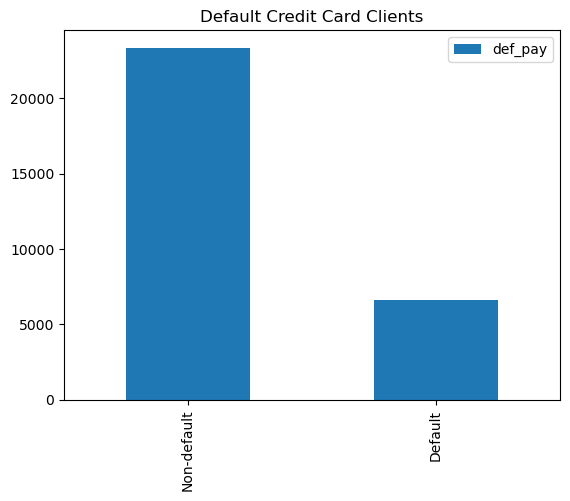

In [22]:
def_pay_df = pd.DataFrame(df['def_pay'].value_counts())
def_pay_df.index = ['Non-default', 'Default']
def_pay_df.plot(kind="bar", title="Default Credit Card Clients")

### 4.1 Bar Plot for Categorical Variables

Text(0, 0.5, 'Frequency')

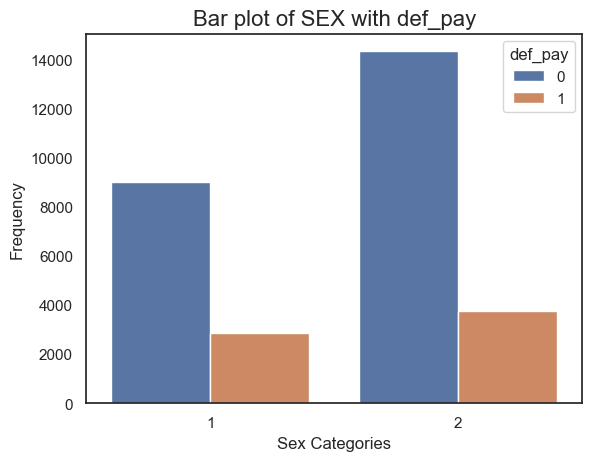

In [23]:
sns.set(style='white')
sns.countplot(data=df, x='SEX', hue='def_pay')

plt.title('Bar plot of SEX with def_pay', fontsize=16)
plt.xlabel('Sex Categories')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

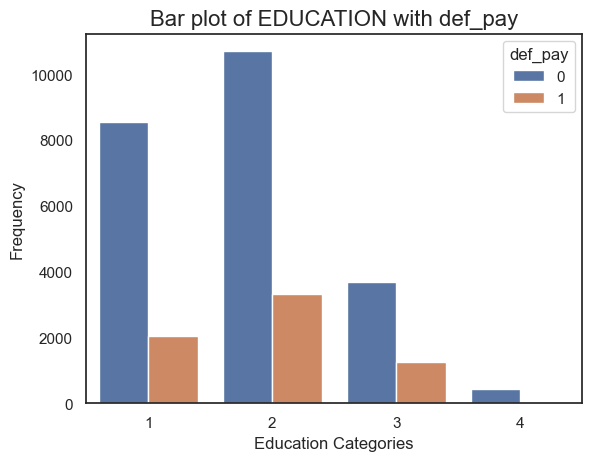

In [24]:
sns.set(style='white')
sns.countplot(data=df, x='EDUCATION', hue='def_pay')

plt.title('Bar plot of EDUCATION with def_pay', fontsize=16)
plt.xlabel('Education Categories')
plt.ylabel('Frequency')

# we can consider combining EDUCATION category 4 (others) to category 3 (high school) since there is 
# no defaulters (def_pay : class 1) in category 4. 

Text(0, 0.5, 'Frequency')

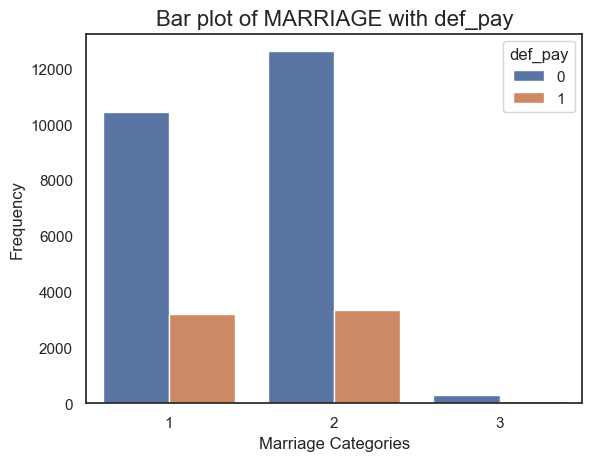

In [25]:
sns.set(style='white')
sns.countplot(data=df, x='MARRIAGE', hue='def_pay')

plt.title('Bar plot of MARRIAGE with def_pay', fontsize=16)
plt.xlabel('Marriage Categories')
plt.ylabel('Frequency')

# we can consider combining MARRIAGE category 3 (others) to category 2 (single) since there is 
# no defaulters (def_pay : class 1) in category 3. 

### 4.2 Histogram for Continuous Variables

Text(0, 0.5, 'Frequency')

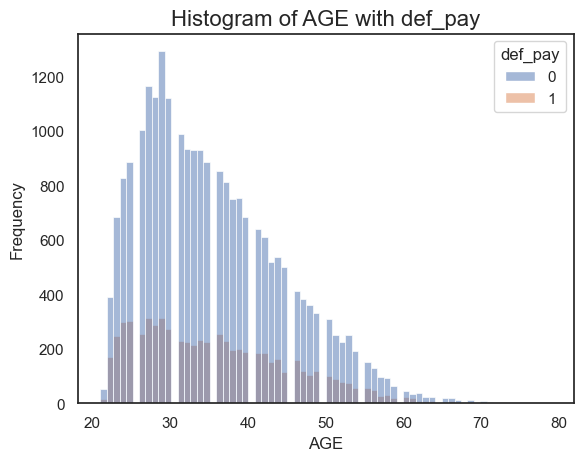

In [26]:
sns.set(style='white')
sns.histplot(data=df, x='AGE', hue='def_pay')

plt.title('Histogram of AGE with def_pay', fontsize=16)
plt.xlabel('AGE')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

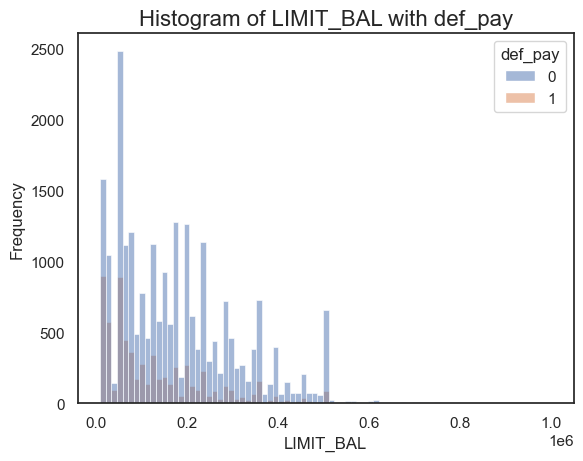

In [27]:
sns.set(style='white')
sns.histplot(data=df, x='LIMIT_BAL', hue='def_pay')

plt.title('Histogram of LIMIT_BAL with def_pay', fontsize=16)
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

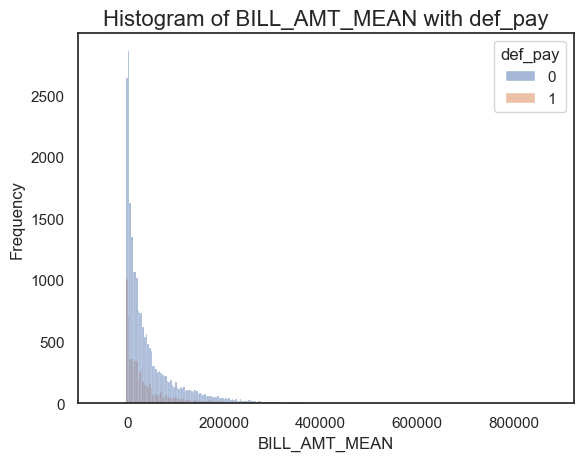

In [28]:
sns.set(style='white')
sns.histplot(data=df, x='BILL_AMT_MEAN', hue='def_pay')

plt.title('Histogram of BILL_AMT_MEAN with def_pay', fontsize=16)
plt.xlabel('BILL_AMT_MEAN')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

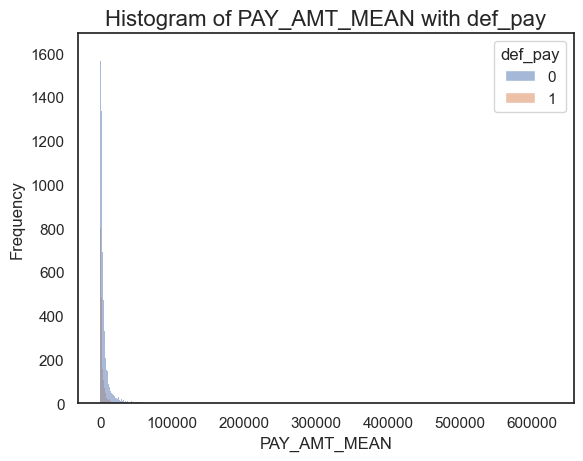

In [29]:
sns.set(style='white')
sns.histplot(data=df, x='PAY_AMT_MEAN', hue='def_pay')

plt.title('Histogram of PAY_AMT_MEAN with def_pay', fontsize=16)
plt.xlabel('PAY_AMT_MEAN')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

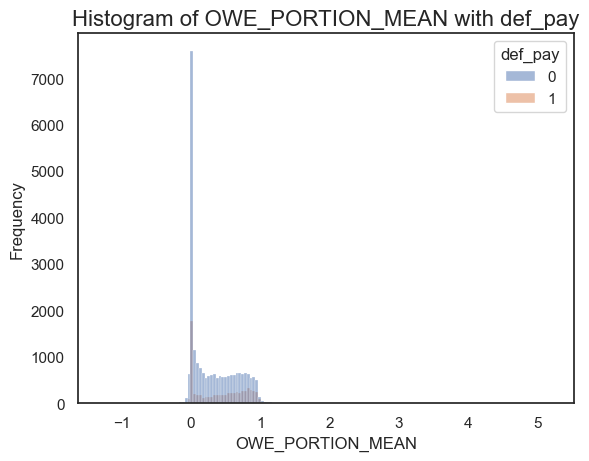

In [30]:
sns.set(style='white')
sns.histplot(data=df, x='OWE_PORTION_MEAN', hue='def_pay')

plt.title('Histogram of OWE_PORTION_MEAN with def_pay', fontsize=16)
plt.xlabel('OWE_PORTION_MEAN')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

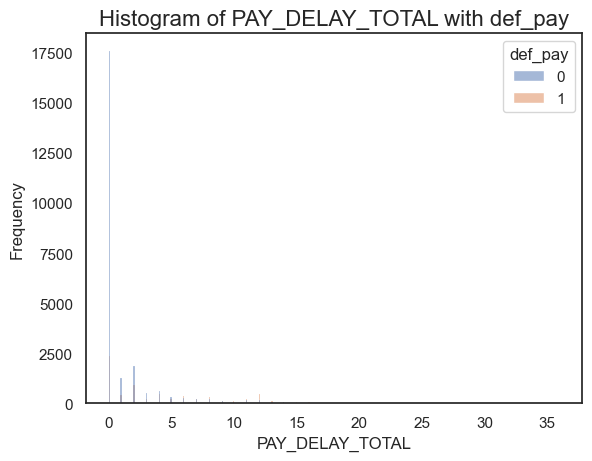

In [31]:
sns.set(style='white')
sns.histplot(data=df, x='PAY_DELAY_TOTAL', hue='def_pay')

plt.title('Histogram of PAY_DELAY_TOTAL with def_pay', fontsize=16)
plt.xlabel('PAY_DELAY_TOTAL')
plt.ylabel('Frequency')

### 4.3 Boxplot for Continuous Variables

The interquartile range (IQR) is defined as the distance between upper and lower quartiles : IQR = Q3 - Q1. Using `pandas` in-build boxplot function, every sample located beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR is considered as an outlier. 

<AxesSubplot:>

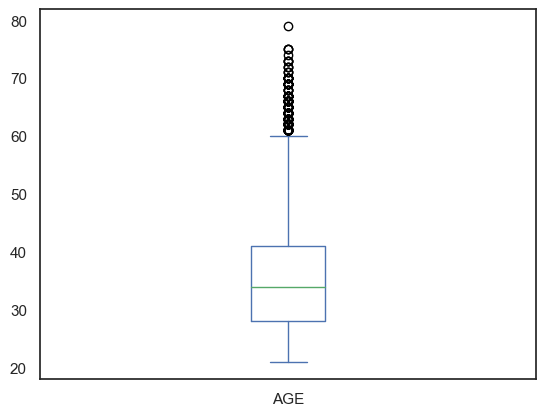

In [32]:
df['AGE'].plot(kind='box')

<AxesSubplot:>

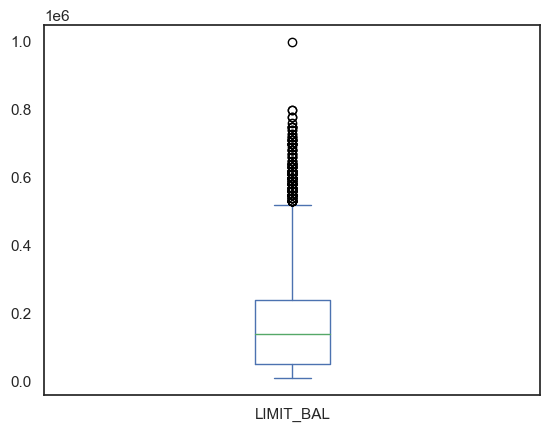

In [33]:
df['LIMIT_BAL'].plot(kind='box')

<AxesSubplot:>

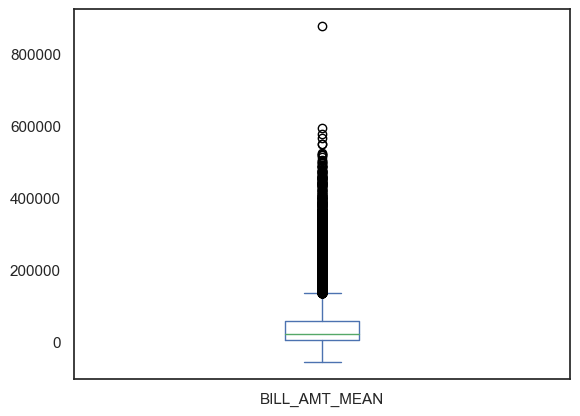

In [34]:
df['BILL_AMT_MEAN'].plot(kind='box')

<AxesSubplot:>

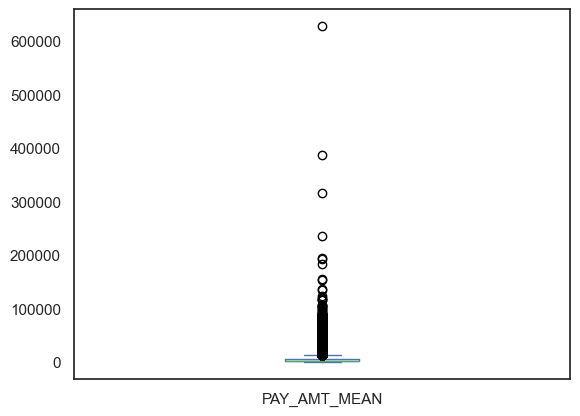

In [35]:
df['PAY_AMT_MEAN'].plot(kind='box')

<AxesSubplot:>

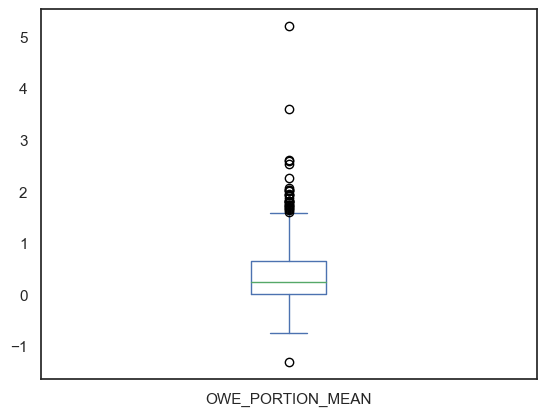

In [36]:
df['OWE_PORTION_MEAN'].plot(kind='box')

<AxesSubplot:>

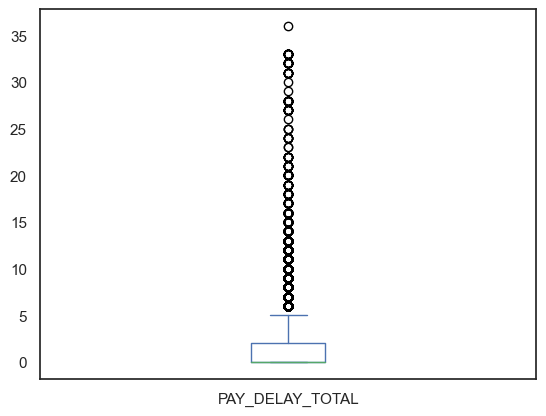

In [37]:
df['PAY_DELAY_TOTAL'].plot(kind='box')

We need to consider on how to deal with the outliers. 

### 4.4 Correlation Plot 
#### Feature selection with Filter Method using Correlation 

We know that `SEX`, `EDUCATION` and `MARRIAGE` are categorical features (although they are initially numerical encoded). We drop them in the generation of correlation plot and only consider the continuous numerical features. 

<AxesSubplot:>

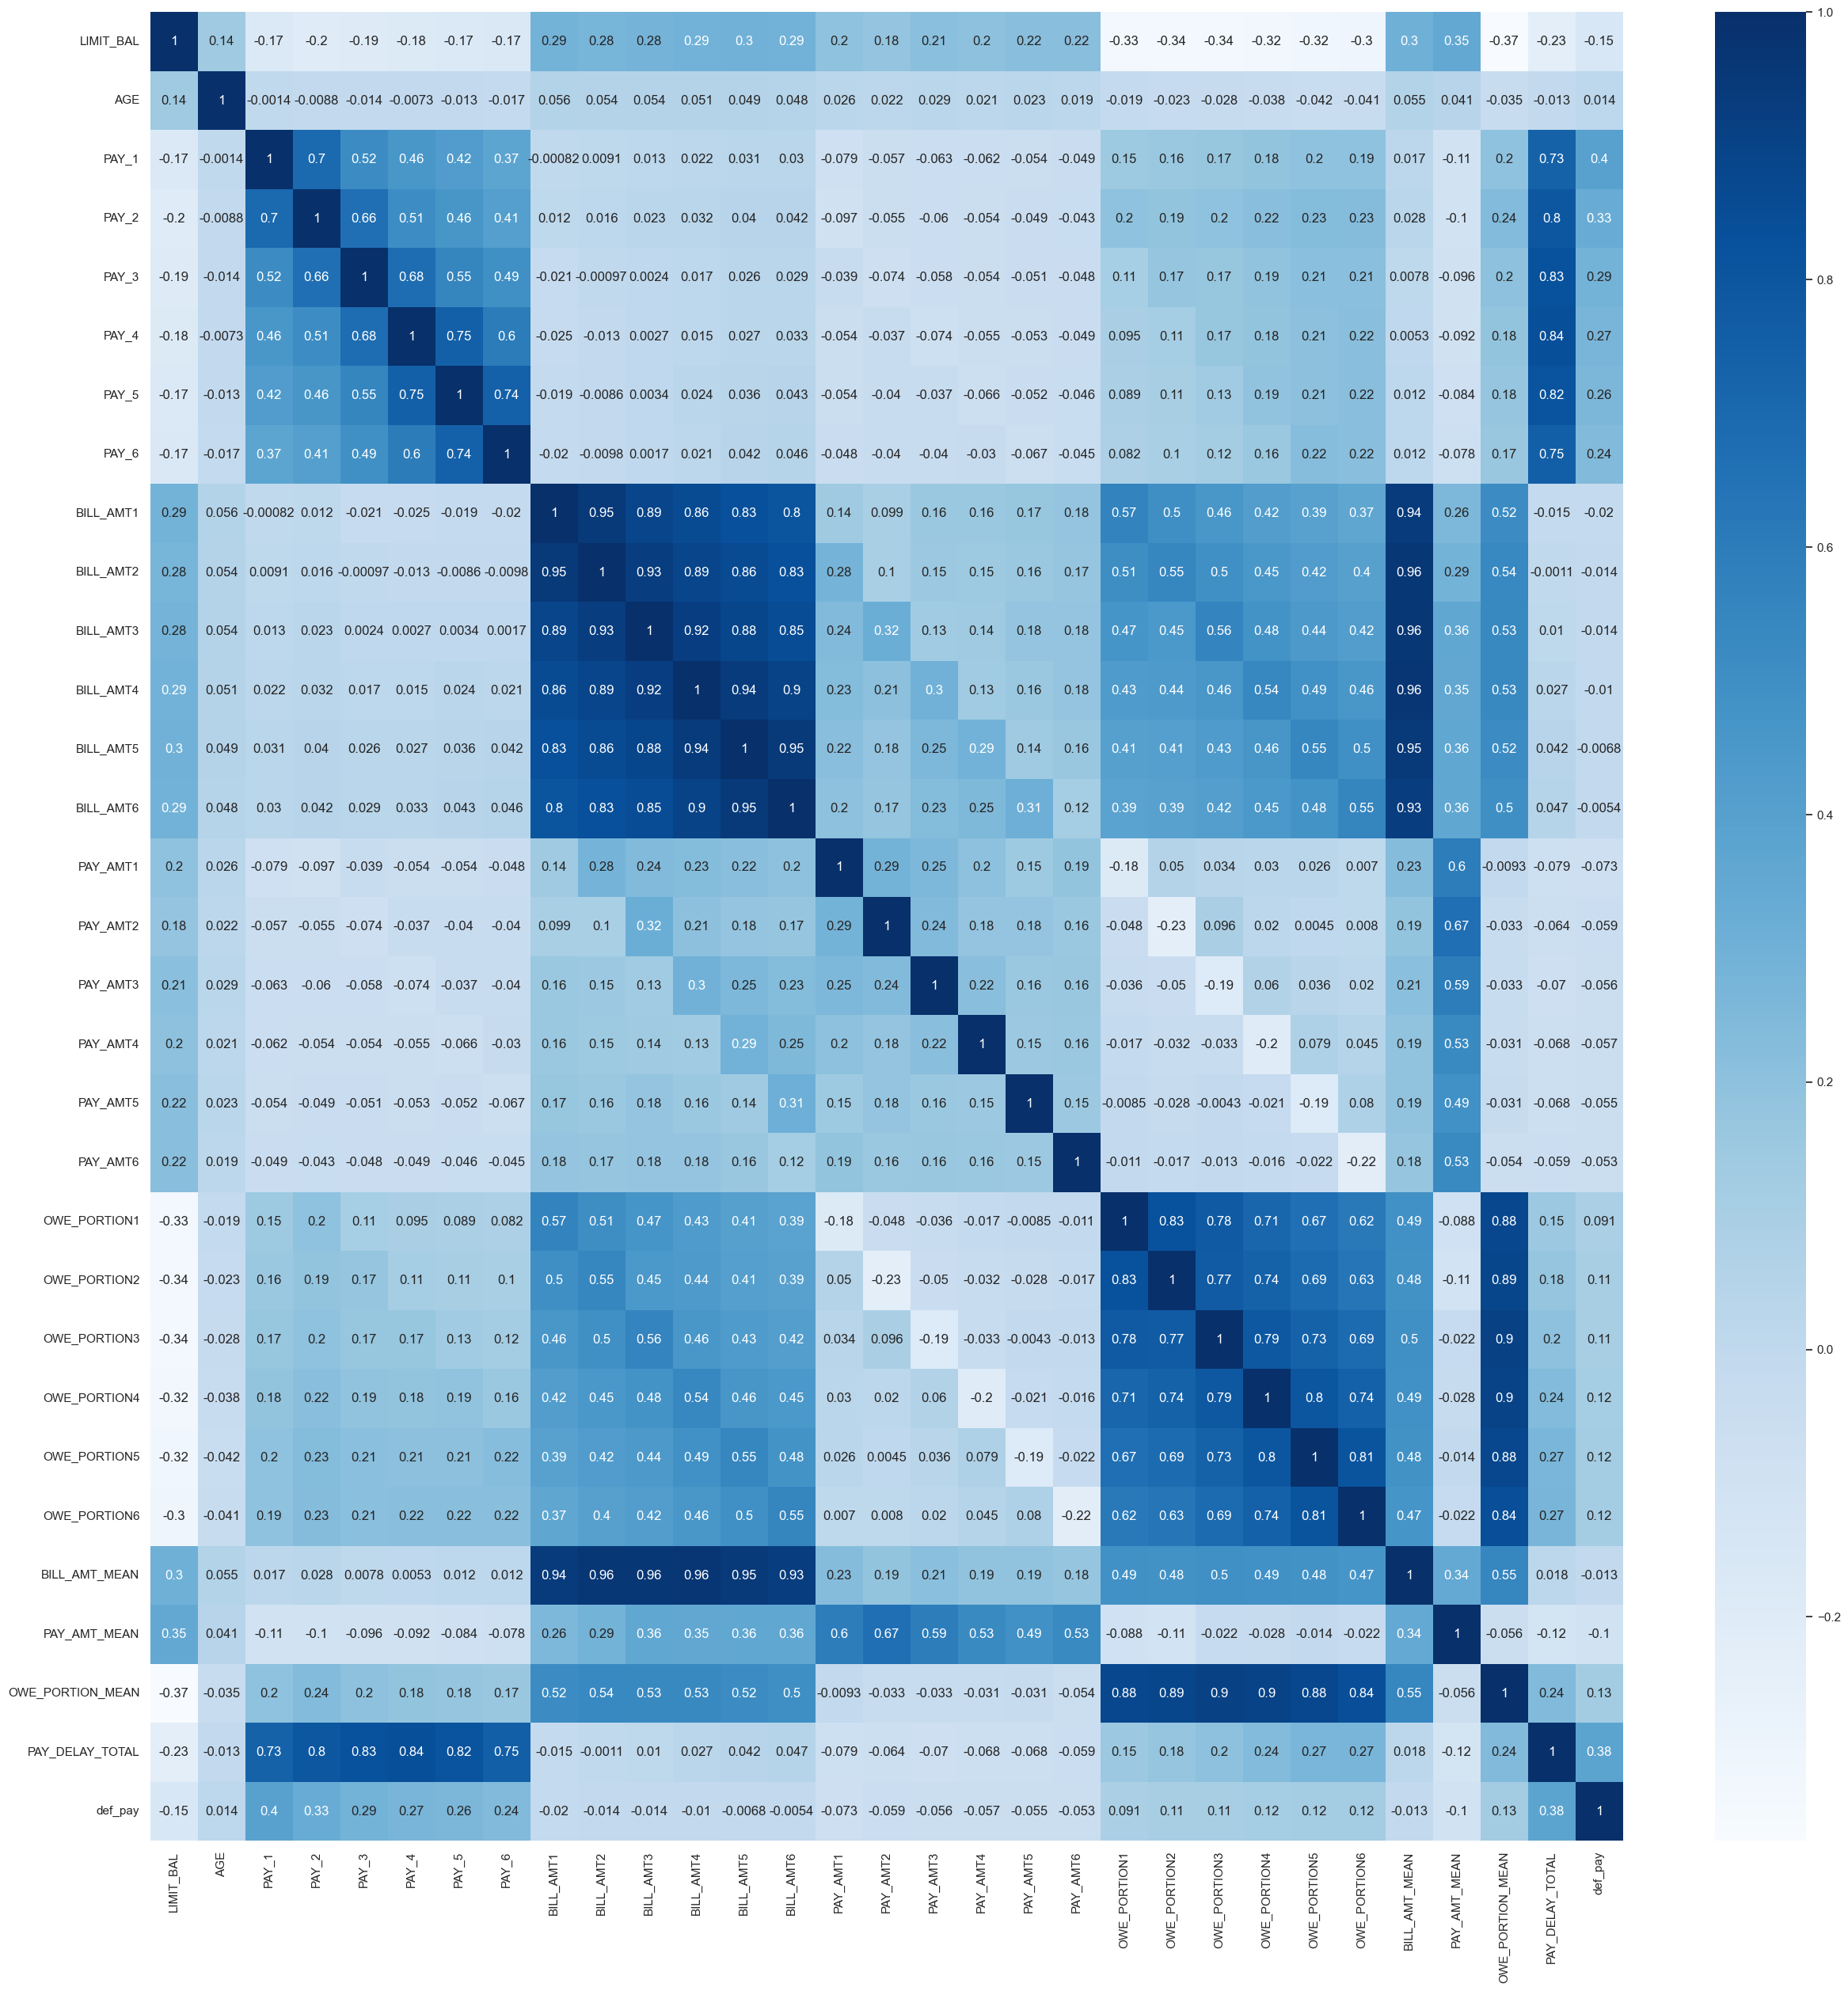

In [38]:
cor = df.drop(columns=["SEX", "EDUCATION", "MARRIAGE"]).corr()
plt.figure(figsize=(30,30))
sns.set(font_scale=1.0)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

#### Multicollinearity

There exists time-based features in the dataset, which are `PAY_n`, `BILL_AMTn`, `PAY_AMTn` and `OWE_PORTIONn`. From the correlation plot, we observe **multicollinearity** between these time-based features.  

*Note : The 6 X 6 similar color intensity box at the diagonal of the correlation plot shows multicollinearity.*  

We observe `PAY_n`, `BILL_AMTn` and `OWE_PORTIONn` **highly correlates within themselves** with Pearson's correlation coefficient >= 0.7. Therefore, these columns need to be **removed from the dataset** to maintain internal validity of our analysis.  

However, `PAY_AMTn` only has correlation <= 0.2 within themselves, we will further investigate the statistical significance of these features in **Section 6 - Feature Selection**. 

#### Correlation with target variable (def_pay)

We focus on the last row of the correlation plot (or the results from absoulte value of `new_cor['def_pay']` below), we notice that `LIMIT_BAL`, `PAY_AMT_MEAN`, `OWE_PORTION_MEAN` and `PAY_DELAY_TOTAL` have correlation coefficient **Corr(X, y) >= 0.1**. That means, these feature may be useful for our model predictions. We can further justify their statistical significance in later steps.

In [39]:
new_cor = df.drop(columns=["SEX", "EDUCATION", "MARRIAGE"]).corr()
abs(new_cor['def_pay'])

LIMIT_BAL           0.153520
AGE                 0.013890
PAY_1               0.396019
PAY_2               0.327093
PAY_3               0.286999
PAY_4               0.269055
PAY_5               0.260850
PAY_6               0.244437
BILL_AMT1           0.019644
BILL_AMT2           0.014193
BILL_AMT3           0.014076
BILL_AMT4           0.010156
BILL_AMT5           0.006760
BILL_AMT6           0.005372
PAY_AMT1            0.072929
PAY_AMT2            0.058579
PAY_AMT3            0.056250
PAY_AMT4            0.056827
PAY_AMT5            0.055124
PAY_AMT6            0.053183
OWE_PORTION1        0.091292
OWE_PORTION2        0.105681
OWE_PORTION3        0.106457
OWE_PORTION4        0.117499
OWE_PORTION5        0.121908
OWE_PORTION6        0.123880
BILL_AMT_MEAN       0.012691
PAY_AMT_MEAN        0.102354
OWE_PORTION_MEAN    0.125141
PAY_DELAY_TOTAL     0.376034
def_pay             1.000000
Name: def_pay, dtype: float64

In [40]:
dropped_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                'OWE_PORTION1', 'OWE_PORTION2', 'OWE_PORTION3', 'OWE_PORTION4', 'OWE_PORTION5', 'OWE_PORTION6']

df.drop(columns=dropped_cols, axis=1, inplace=True)

## 5. Train-Test Split

We split the data into training set and test set, with a ratio of **train : test = 3 : 1**. As the dataset is **highly imbalanced**, with 77.88% of non-defaulters (`class = 0`) and 22.12% of defaulters (`class = 1`), we apply **stratified sampling** during the split. Stratified sampling ensures that the proportion of defaulters and non-defaulters in each of the training and test sets would be approximately the same as the initial dataset before splitting. 

The split is randomly generated. However, in order to keep it the same for the whole notebook, we set `random_state = 42` in the split. This ensures that all evaluations are statistically meaningful and results produced from different classifiers are consistent. 

In [41]:
# 75 : 25 train-test split 
X = df.drop(columns=['def_pay'])
y = df['def_pay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify=y)

In [42]:
df['def_pay'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: def_pay, dtype: float64

In [43]:
y_train.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: def_pay, dtype: float64

In [44]:
y_test.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: def_pay, dtype: float64

### 5.1 Feature Engineering After Split
- one-hot encoding on categorical variables 
- feature scaling on continuous variables : 
    - standardization  
    - normalization

To avoid data leaking into the test set, we only **fit** the Encoder (one-hot encoding) and Scaler (feature scaling) on the **training set**. Then, we transform the training and test dataset with the fitted Encoder and Scaler. 

#### One-Hot Encoding

In [45]:
# One-Hot Encoding on Categorical Variables 
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']

enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

transformer_enc = ColumnTransformer([
    ("categorical", enc, categorical_vars)
], remainder="passthrough")

transformer_enc.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['SEX', 'EDUCATION', 'MARRIAGE'])])

In [46]:
# one-hot encode the training set 
X_train = pd.DataFrame(transformer_enc.transform(X_train), columns=transformer_enc.get_feature_names_out())

In [47]:
# one-hot encode the test set 
X_test = pd.DataFrame(transformer_enc.transform(X_test), columns=transformer_enc.get_feature_names_out())

In [48]:
# rename column names 
colnames_dict = {'remainder__LIMIT_BAL': 'LIMIT_BAL', 'remainder__AGE': 'AGE', 
                                  'remainder__BILL_AMT_MEAN': 'BILL_AMT_MEAN', 
                                  'remainder__PAY_AMT_MEAN': 'PAY_AMT_MEAN', 
                                  'remainder__OWE_PORTION_MEAN': 'OWE_PORTION_MEAN', 
                                  'remainder__PAY_DELAY_TOTAL' : 'PAY_DELAY_TOTAL', 
                                  'remainder__PAY_AMT1': 'PAY_AMT1', 'remainder__PAY_AMT2': 'PAY_AMT2', 
                                  'remainder__PAY_AMT3': 'PAY_AMT3', 'remainder__PAY_AMT4': 'PAY_AMT4', 
                                  'remainder__PAY_AMT5': 'PAY_AMT5', 'remainder__PAY_AMT6': 'PAY_AMT6'}

X_train.rename(columns=colnames_dict, inplace=True)
X_test.rename(columns=colnames_dict, inplace=True)

#### Feature Scaling

In [49]:
# copy train and test set for feature scaling

# for standardization 
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# for normalization 
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

In [50]:
# Feature Scaling on Numerical Continuous Variables 

num_vars = ['LIMIT_BAL','AGE', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
            'BILL_AMT_MEAN', 'PAY_AMT_MEAN','OWE_PORTION_MEAN', 'PAY_DELAY_TOTAL']

#### Feature Scaling - Standardization 

In [51]:
for i in num_vars:
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the test data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

#### Feature Scaling - Normalization

In [52]:
for i in num_vars:
    # fit on training data column
    scale = MinMaxScaler().fit(X_train_norm[[i]])
    
    # transform the training data column
    X_train_norm[i] = scale.transform(X_train_norm[[i]])
    
    # transform the test data column
    X_test_norm[i] = scale.transform(X_test_norm[[i]])

#### Boxplots Comparison 
We compare the boxplot for the same numerical features on `X_train` (without feature scaling), `X_stand` (standardized data) and `X_norm` (normalized data). We pay attention to the outliers distribution in these 3 boxplots. 

In [53]:
sns.set(style='white')

Text(0.5, 1.0, 'Boxplot of X_train without Scaling')

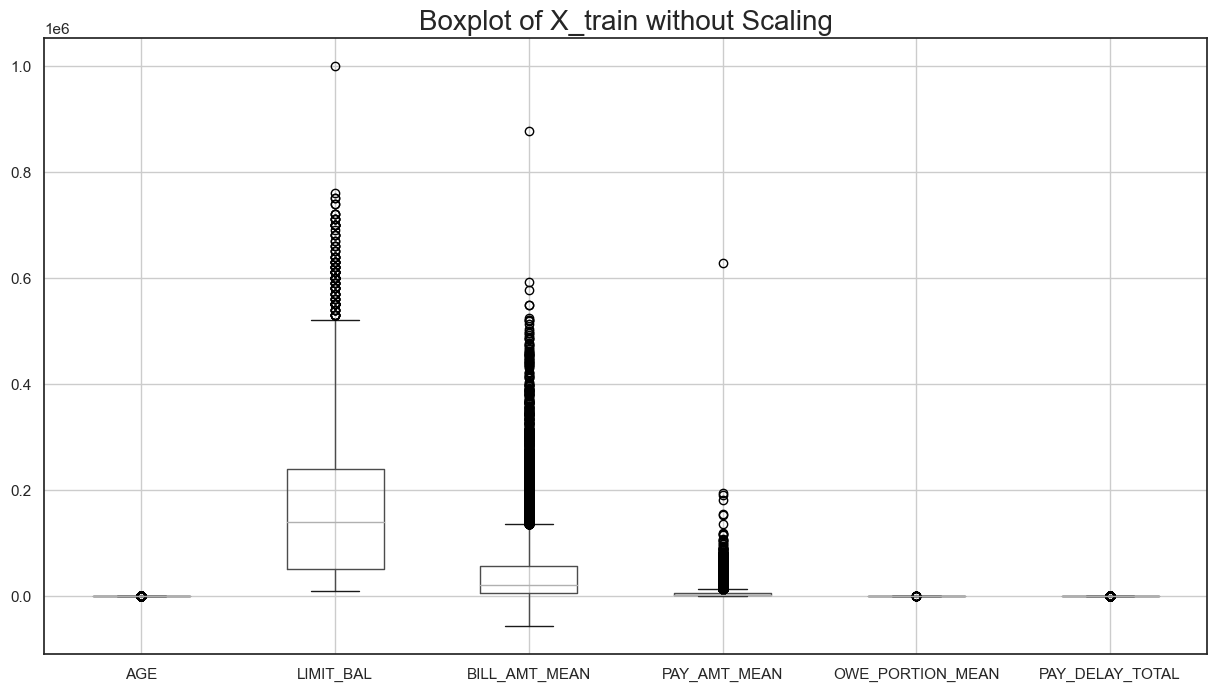

In [54]:
boxplot_no_scaling = X_train.boxplot(column=['AGE', 'LIMIT_BAL', 'BILL_AMT_MEAN', 
                                                 'PAY_AMT_MEAN', 'OWE_PORTION_MEAN', 'PAY_DELAY_TOTAL'], 
                                         figsize=(15,8))  
plt.title('Boxplot of X_train without Scaling', fontsize=20)

Text(0.5, 1.0, 'Boxplot of X_train with Standardization')

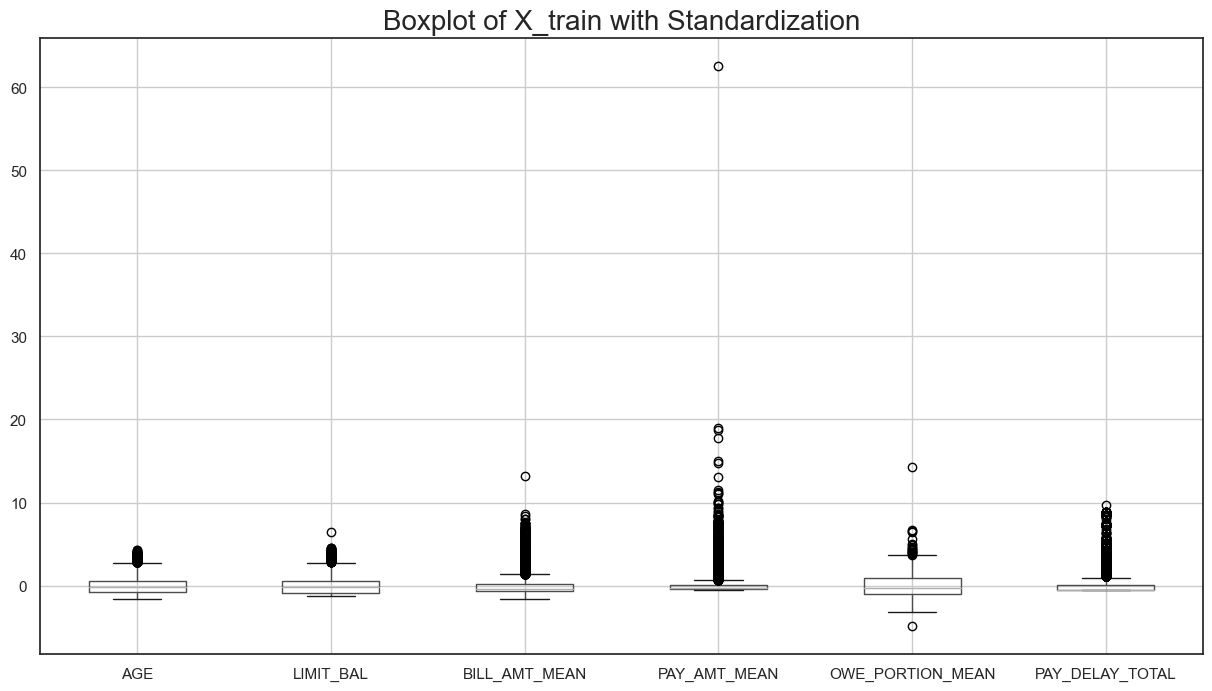

In [55]:
boxplot_standardization = X_train_stand.boxplot(column=['AGE', 'LIMIT_BAL', 'BILL_AMT_MEAN', 
                                                 'PAY_AMT_MEAN', 'OWE_PORTION_MEAN', 'PAY_DELAY_TOTAL'], 
                                         figsize=(15,8))  
plt.title('Boxplot of X_train with Standardization', fontsize=20)

Text(0.5, 1.0, 'Boxplot of X_train with Normalization (Min-Max)')

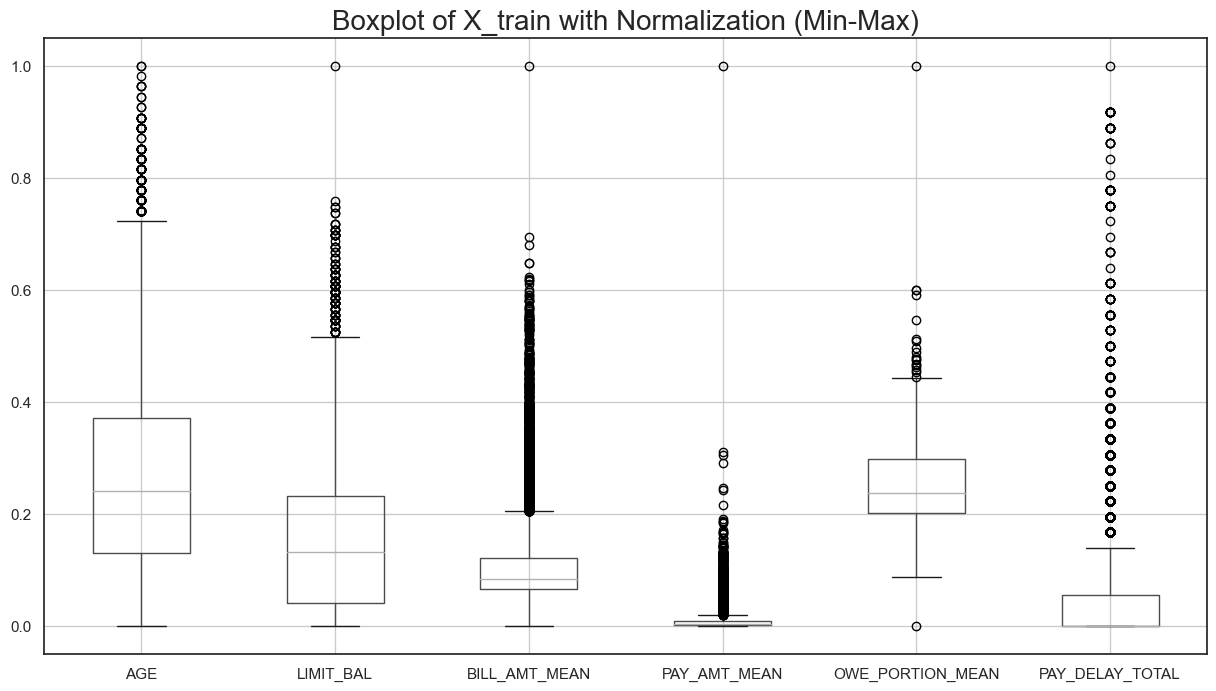

In [56]:
boxplot_normalization = X_train_norm.boxplot(column=['AGE', 'LIMIT_BAL', 'BILL_AMT_MEAN', 
                                                 'PAY_AMT_MEAN', 'OWE_PORTION_MEAN', 'PAY_DELAY_TOTAL'], 
                                         figsize=(15,8)) 
plt.title('Boxplot of X_train with Normalization (Min-Max)', fontsize=20)

We will proceed with **min-max normalized** `X_train_norm` and `X_test_norm`. 

**Need to justify this part**

## 6. Feature Selection 

Feature selection is part of the process of **dimensionality reduction**. If the data is high dimensional (too many features), the machine learning model can suffer from the **curse of dimensionality** in which risking the models to be massively **overfitted**.  

There are 3 main ways of doing feature selection : 
- Filter Method : Pearson's Correlation -> Logistic Regression
- Wrapper Method : Forward Selection, Backward Elimination, Recursive Feature Elimination (forward-backward) 
- Embedded Metods : Lasso regression (L1 Regularisation) & Ridge regression (L2 Regularisation)

We will implement filter method with correlation, forward selection and backward elimination for wrapper method.  

**Filter method** using Pearson's Correlation is done in **Section 4.4 - Correlation Plot**. The features dropped are the time-related features, including `PAY_n`, `BILL_AMTn` and `OWE_PORTIONn`.

### 6.1 Logistic Regression for Feature Selection

We can check for the statistical significance p-value of the features using Logistic Regression. 

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
logit_model = sm.Logit(list(y_train), X_train_norm)
sm_result = logit_model.fit_regularized()
print(sm_result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.45842281030559257
            Iterations: 182
            Function evaluations: 183
            Gradient evaluations: 182
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22479
Method:                           MLE   Df Model:                           20
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.1325
Time:                        20:58:49   Log-Likelihood:                -10315.
converged:                       True   LL-Null:                       -11890.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

From the results above, we see that the six `PAY_AMTn` features have p-value > 0.05. Therefore, we fail to reject the null hypothesis and conclude that `PAY_AMTn` features are statistically insignificant. We can remove them from the dataset.  

On the other hand, we see that `LIMIT_BAL`, `AGE`, `BILL_AMT_MEAN` and `PAY_DELAY_TOTAL` have p-value < 0.05. Therefore, we reject the null hypothesis and conclude that these features are statistically significant and should be selected for model prediction. 

In [59]:
dropped_payamtcols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

X_train.drop(columns=dropped_payamtcols, axis=1, inplace=True)
X_train_stand.drop(columns=dropped_payamtcols, axis=1, inplace=True)
X_train_norm.drop(columns=dropped_payamtcols, axis=1, inplace=True)

### 6.2 Wrapper Method
We are using `scoring = 'f1'` as the evaluation criterion for feature selection for a classification problem. We choose f1-score instead of accuracy as our scoring metrics because **false negatives** are more crucial in our model. Also, due to **imbalanced** dataset, it is better to evaluate using f1-score compared to accuracy.  

References : [Accuracy vs F1-Score](https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2)

### Sequential Forward Selection

In [60]:
sfs = SFS(LogisticRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'f1',
          cv = 0)

sfs.fit(X_train_norm, y_train)
sfs.k_feature_names_

('categorical__SEX_1',
 'categorical__SEX_2',
 'categorical__EDUCATION_3',
 'categorical__EDUCATION_4',
 'categorical__MARRIAGE_3',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT_MEAN',
 'PAY_AMT_MEAN',
 'PAY_DELAY_TOTAL')

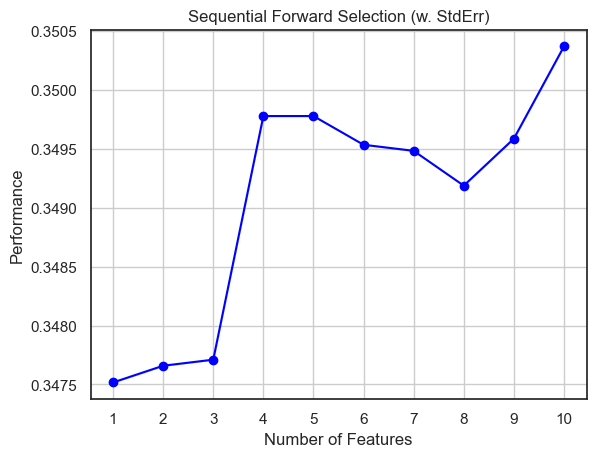

In [61]:
plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### Sequential Backward Elimination

In [62]:
sbs = SFS(LogisticRegression(),
         k_features=10,
         forward=False,
         floating=False,
          scoring = 'f1',
         cv=0)

sbs.fit(X_train_norm, y_train)
sbs.k_feature_names_

('categorical__SEX_1',
 'categorical__SEX_2',
 'categorical__EDUCATION_3',
 'categorical__EDUCATION_4',
 'categorical__MARRIAGE_3',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT_MEAN',
 'PAY_AMT_MEAN',
 'PAY_DELAY_TOTAL')

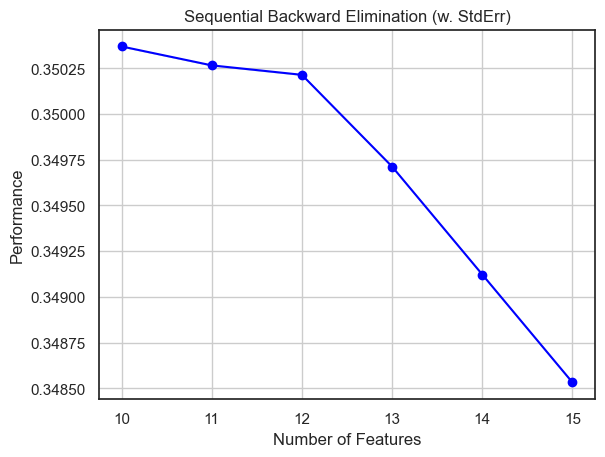

In [63]:
plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

### 6.3 Features Selected 
Combining our findings in : 

1. Filter method using correlation plot
2. Checking statistical significance of features with logistic regression 
3. Wrapper method with forward selection and backward elimination

Features selected for modelling are : `SEX`, `EDUCATION`, `MARRIAGE`, `LIMIT_BAL`, `AGE`, `BILL_AMT_MEAN`, `PAY_AMT_MEAN`, `PAY_DELAY_TOTAL`. 

In [64]:
# dropping the AGE and OWE_PORTION_MEAN columns

X_train.drop(columns=['OWE_PORTION_MEAN'], axis=1, inplace=True)
X_train_stand.drop(columns=['OWE_PORTION_MEAN'], axis=1, inplace=True)
X_train_norm.drop(columns=['OWE_PORTION_MEAN'], axis=1, inplace=True)

## 7. Model Selection 

**Hyperparameter tuning with GridSearch CV**  

- baseline model 
- logistic regression 
- svm 
- gradient boosting 
- random forest 
- neural network 

#### Oversampling with SMOTE 
We only oversample on the train dataset to balance it.  

This [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648438/) argues that feature selection should be performed before oversampling. 

In [173]:
y_train.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: def_pay, dtype: float64

In [174]:
# oversampling train dataset
sm = SMOTE()
X_train_norm_sm, y_train_sm = sm.fit_resample(X_train_norm, y_train)

In [175]:
y_train_sm.value_counts(normalize=True)

1    0.5
0    0.5
Name: def_pay, dtype: float64

#### Removing columns from X_test 


In [65]:
dropped_cols_test = ['PAY_AMT1', 'PAY_AMT2', 
                     'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                     'PAY_AMT6', 'OWE_PORTION_MEAN']

X_test2 = X_test.drop(columns=dropped_cols_test, axis=1)
X_test2_stand = X_test_stand.drop(columns=dropped_cols_test, axis=1)
X_test2_norm = X_test_norm.drop(columns=dropped_cols_test, axis=1)

In [104]:
# Helper function to get model performance on training data 
def performance_on_train(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:,1]
    result_dict = dict()
    
    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y, y_pred, labels=[1, 0])
    print("Train Confusion Matrix:\n", cfn_matrix)
    
    # accuracy 
    accuracy = metrics.accuracy_score(y, y_pred)
    print("Train Accuracy: ", accuracy)
    result_dict["Accuracy"] = accuracy
    
    # precision
    precision = metrics.precision_score(y, y_pred)
    print("Train Precision: ", precision)
    result_dict["Precision"] = precision
    
    # recall
    recall = metrics.recall_score(y, y_pred)
    print("Train Recall: ", recall)
    result_dict["Recall"] = recall

    # f1 score
    f1 = metrics.f1_score(y, y_pred)
    print("Train F1 Score: ", f1)
    result_dict["F1 Score"] = f1
    
    # auc score
    auc = metrics.roc_auc_score(y, y_pred_proba)
    print("Train AUC: ", auc)
    result_dict["AUC"] = auc
    
    return result_dict

In [105]:
# Helper function to get model performance on test data 
def performance_on_test(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:,1]
    result_dict = dict()
    
    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y, y_pred, labels=[1, 0])
    print("Test Confusion Matrix:\n", cfn_matrix)
    
    # accuracy 
    accuracy = metrics.accuracy_score(y, y_pred)
    print("Test Accuracy: ", accuracy)
    result_dict["Accuracy"] = accuracy
    
    # precision
    precision = metrics.precision_score(y, y_pred)
    print("Test Precision: ", precision)
    result_dict["Precision"] = precision
    
    # recall
    recall = metrics.recall_score(y, y_pred)
    print("Test Recall: ", recall)
    result_dict["Recall"] = recall

    # f1 score
    f1 = metrics.f1_score(y, y_pred)
    print("Test F1 Score: ", f1)
    result_dict["F1 Score"] = f1
    
    # auc score
    auc = metrics.roc_auc_score(y, y_pred_proba)
    print("Test AUC: ", auc)
    result_dict["AUC"] = auc
    
    return result_dict

### 7.1 Baseline Model 

Due to imbalance classes, we will first generate a baseline model before implementing other classifiers. 

References : 
- https://www.geeksforgeeks.org/ml-dummy-classifiers-using-sklearn/
- https://towardsdatascience.com/why-using-a-dummy-classifier-is-a-smart-move-4a55080e3549

In [216]:
baseline_model = DummyClassifier() 
baseline_model.fit(X_train_norm_sm, y_train_sm)

DummyClassifier()

In [217]:
print('Baseline model performance on training data :')
baseline_perf_train = performance_on_train(baseline_model, X_train_norm_sm, y_train_sm)

Baseline model performance on training data :
Train Confusion Matrix:
 [[    0 17523]
 [    0 17523]]
Train Accuracy:  0.5
Train Precision:  0.0
Train Recall:  0.0
Train F1 Score:  0.0
Train AUC:  0.5


In [218]:
print('Baseline model performance on test data :')
baseline_perf_test = performance_on_test(baseline_model, X_test2_norm, y_test)

Baseline model performance on test data :
Test Confusion Matrix:
 [[   0 1659]
 [   0 5841]]
Test Accuracy:  0.7788
Test Precision:  0.0
Test Recall:  0.0
Test F1 Score:  0.0
Test AUC:  0.5


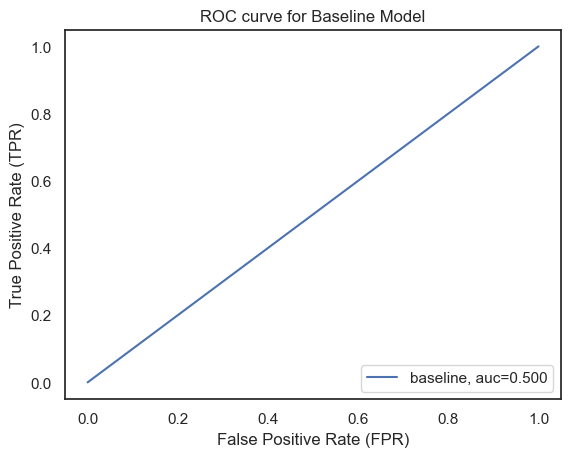

In [219]:
# plot roc curve for Baseline model on test data 

y_pred_proba_baseline = baseline_model.predict_proba(X_test2_norm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_baseline)
auc_baseline = metrics.roc_auc_score(y_test, y_pred_proba_baseline)

plt.plot(fpr, tpr, label="baseline, auc="+str("{:.3f}".format(auc_baseline)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve for Baseline Model')
plt.show()

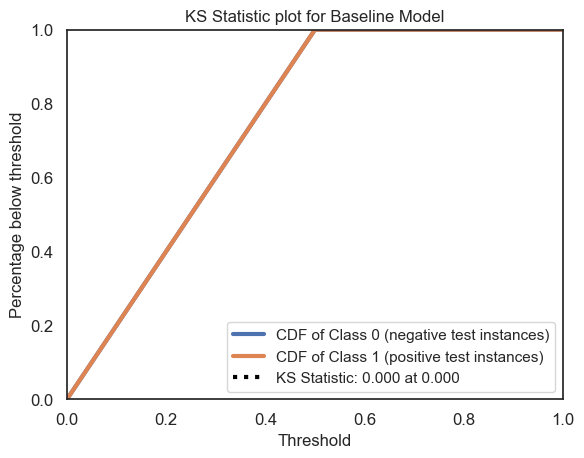

In [236]:
# plot ks statistic plot for Baseline model on test data 

y_pred_proba_baseline_full = baseline_model.predict_proba(X_test2_norm)
skplt.metrics.plot_ks_statistic(y_test, y_pred_proba_baseline_full)
plt.title('KS Statistic plot for Baseline Model')
L=plt.legend()
L.get_texts()[0].set_text('CDF of Class 0 (negative test instances)')
L.get_texts()[1].set_text('CDF of Class 1 (positive test instances)')
plt.show()

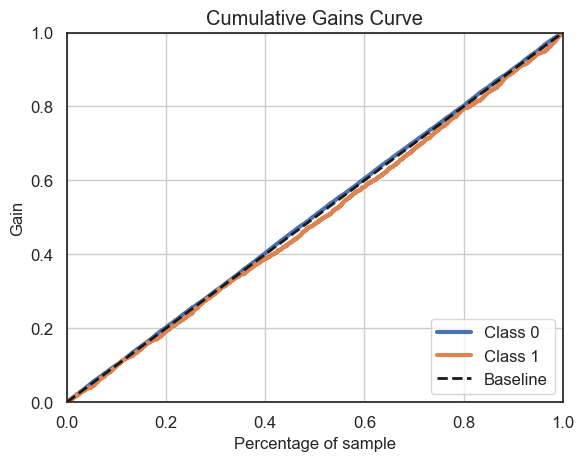

In [237]:
# plot Cumulative Gains Curve for Baseline model on test data

skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba_baseline_full)
plt.show()

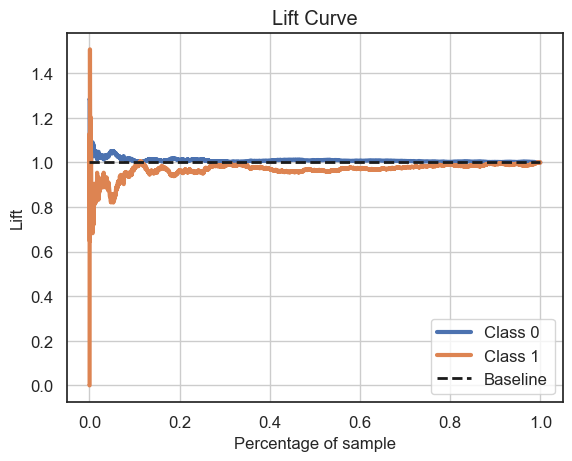

In [238]:
# plot Cumulative Lift Curve for Baseline model on test data

skplt.metrics.plot_lift_curve(y_test, y_pred_proba_baseline_full)
plt.show()

### 7.2 Logistic Regression Model

In [225]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_norm_sm, y_train_sm)

LogisticRegression()

In [226]:
print('Logistic Regression model performance on training data :')
logreg_perf_train = performance_on_train(logreg_model, X_train_norm_sm, y_train_sm)

Logistic Regression model performance on training data :
Train Confusion Matrix:
 [[ 9528  7995]
 [ 2748 14775]]
Train Accuracy:  0.6934600239684986
Train Precision:  0.7761485826001955
Train Recall:  0.5437425098442048
Train F1 Score:  0.6394845464612906
Train AUC:  0.7548708917728038


In [227]:
print('Logistic Regression model performance on test data :')
logreg_perf_test = performance_on_test(logreg_model, X_test2_norm, y_test)

Logistic Regression model performance on test data :
Test Confusion Matrix:
 [[ 864  795]
 [ 960 4881]]
Test Accuracy:  0.766
Test Precision:  0.47368421052631576
Test Recall:  0.5207956600361664
Test F1 Score:  0.49612403100775193
Test AUC:  0.7361554986528167


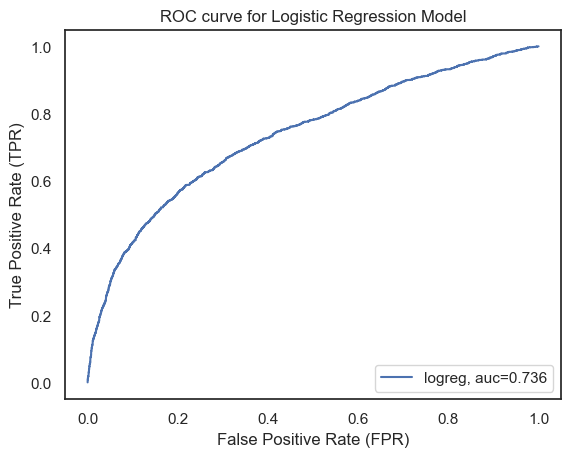

In [228]:
# plot roc curve for Logistic Regression model on test data 

y_pred_proba_logreg = logreg_model.predict_proba(X_test2_norm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_logreg)
auc_logreg = metrics.roc_auc_score(y_test, y_pred_proba_logreg)

plt.plot(fpr, tpr, label="logreg, auc="+str("{:.3f}".format(auc_logreg)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

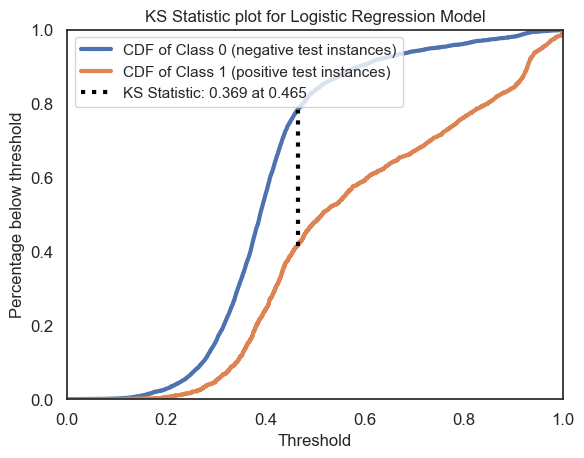

In [232]:
# plot ks statistic plot for Logistic Regression model on test data 

y_pred_proba_logreg_full = logreg_model.predict_proba(X_test2_norm)
skplt.metrics.plot_ks_statistic(y_test, y_pred_proba_logreg_ks)
plt.title('KS Statistic plot for Logistic Regression Model')
L=plt.legend()
L.get_texts()[0].set_text('CDF of Class 0 (negative test instances)')
L.get_texts()[1].set_text('CDF of Class 1 (positive test instances)')
plt.show()

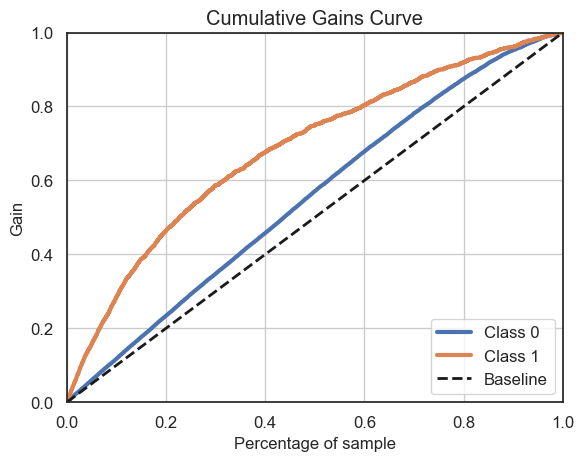

In [233]:
# plot Cumulative Gains Curve for Logistic Regression model on test data

skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba_logreg_full)
plt.show()

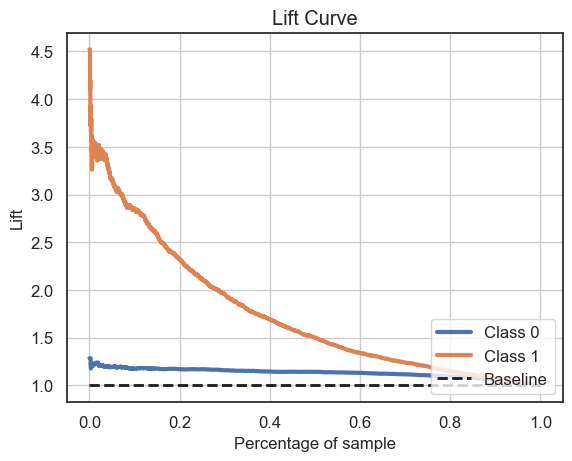

In [234]:
# plot Cumulative Lift Curve for Logistic Regression model on test data

skplt.metrics.plot_lift_curve(y_test, y_pred_proba_logreg_full)
plt.show()

### 7.3 Support Vector Machine Model

In [190]:
svm_model = SVC(kernel='linear', probability=True) 
svm_model.fit(X_train_norm_sm, y_train_sm)

SVC(kernel='linear', probability=True)

In [191]:
print('SVM model performance on training data :')
svm_perf_train = performance_on_train(svm_model, X_train_norm_sm, y_train_sm)

SVM model performance on training data :
Train Confusion Matrix:
 [[ 7648  9875]
 [ 1882 15641]]
Train Accuracy:  0.6645266221537408
Train Precision:  0.8025183630640084
Train Recall:  0.4364549449295212
Train F1 Score:  0.5654086422947547
Train AUC:  0.7571427414355402


In [192]:
print('SVM model performance on test data :')
svm_perf_test = performance_on_test(svm_model, X_test2_norm, y_test)

SVM model performance on test data :
Test Confusion Matrix:
 [[ 713  946]
 [ 644 5197]]
Test Accuracy:  0.788
Test Precision:  0.5254237288135594
Test Recall:  0.42977697408077153
Test F1 Score:  0.4728116710875332
Test AUC:  0.727527004291647


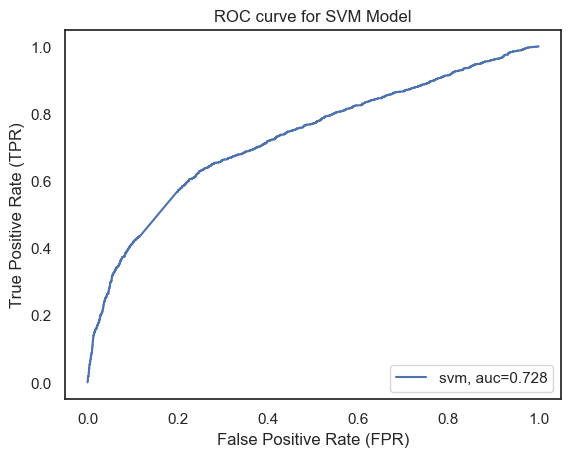

In [193]:
# plot roc curve for SVM model on test data 

y_pred_proba_svm = svm_model.predict_proba(X_test2_norm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_svm)
auc_svm = metrics.roc_auc_score(y_test, y_pred_proba_svm)

plt.plot(fpr, tpr, label="svm, auc="+str("{:.3f}".format(auc_svm)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve for SVM Model')
plt.show()

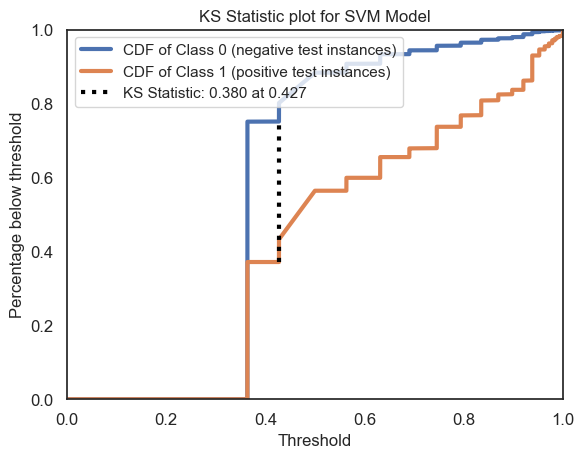

In [239]:
# plot ks statistic plot for SVM model on test data 

y_pred_proba_svm_full = svm_model.predict_proba(X_test2_norm)
skplt.metrics.plot_ks_statistic(y_test, y_pred_proba_svm_full)
plt.title('KS Statistic plot for SVM Model')
L=plt.legend()
L.get_texts()[0].set_text('CDF of Class 0 (negative test instances)')
L.get_texts()[1].set_text('CDF of Class 1 (positive test instances)')
plt.show()

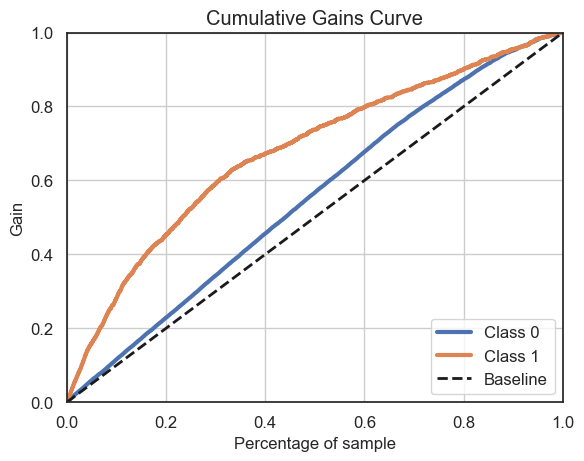

In [240]:
# plot Cumulative Gains Curve for SVM model on test data

skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba_svm_full)
plt.show()

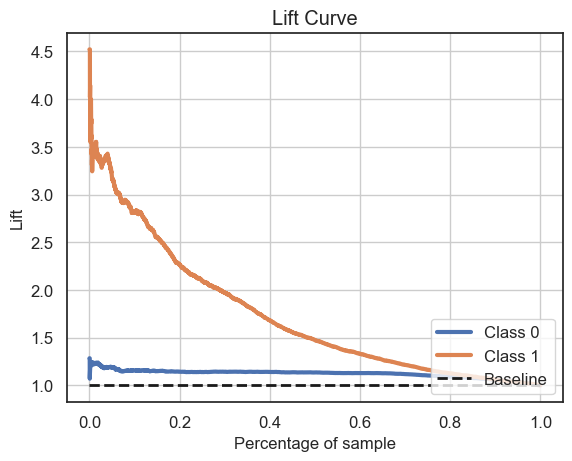

In [241]:
# plot Cumulative Lift Curve for SVM model on test data

skplt.metrics.plot_lift_curve(y_test, y_pred_proba_svm_full)
plt.show()

### 7.4 Random Forest Model

In [195]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_norm_sm, y_train_sm)

RandomForestClassifier()

In [196]:
print('SVM model performance on training data :')
rf_perf_train = performance_on_train(rf_model, X_train_norm_sm, y_train_sm)

SVM model performance on training data :
Train Confusion Matrix:
 [[17517     6]
 [    5 17518]]
Train Accuracy:  0.9996861268047709
Train Precision:  0.999714644446981
Train Recall:  0.9996575928779319
Train F1 Score:  0.9996861178484806
Train AUC:  0.9999899757545158


In [197]:
print('SVM model performance on test data :')
rf_perf_test = performance_on_test(rf_model, X_test2_norm, y_test)

SVM model performance on test data :
Test Confusion Matrix:
 [[ 786  873]
 [ 938 4903]]
Test Accuracy:  0.7585333333333333
Test Precision:  0.45591647331786544
Test Recall:  0.47377938517179025
Test F1 Score:  0.4646763227904227
Test AUC:  0.7268854295243483


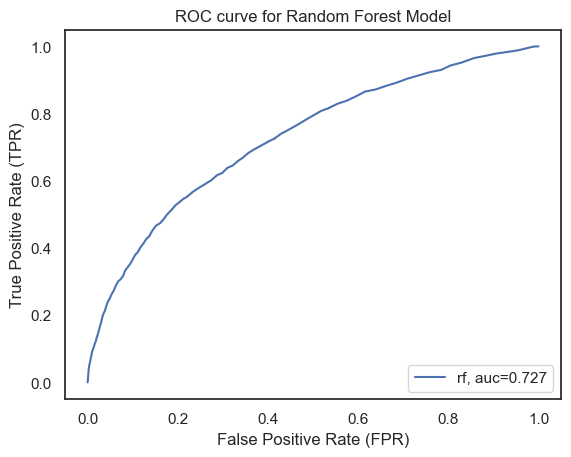

In [198]:
# plot roc curve for Random Forest model on test data 

y_pred_proba_rf = rf_model.predict_proba(X_test2_norm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr, tpr, label="rf, auc="+str("{:.3f}".format(auc_rf)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve for Random Forest Model')
plt.show()

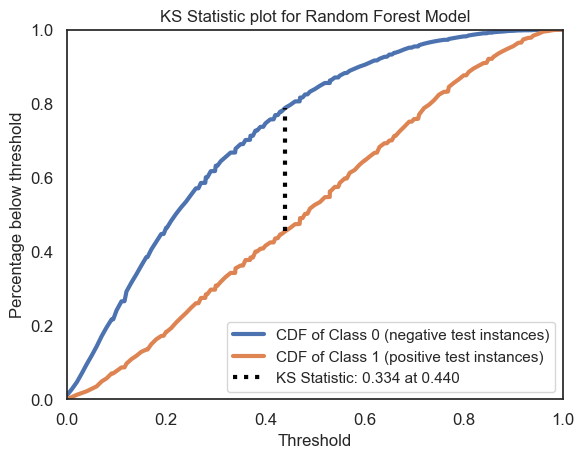

In [242]:
# plot ks statistic plot for Random Forest model on test data 

y_pred_proba_rf_full = rf_model.predict_proba(X_test2_norm)
skplt.metrics.plot_ks_statistic(y_test, y_pred_proba_rf_full)
plt.title('KS Statistic plot for Random Forest Model')
L=plt.legend()
L.get_texts()[0].set_text('CDF of Class 0 (negative test instances)')
L.get_texts()[1].set_text('CDF of Class 1 (positive test instances)')
plt.show()

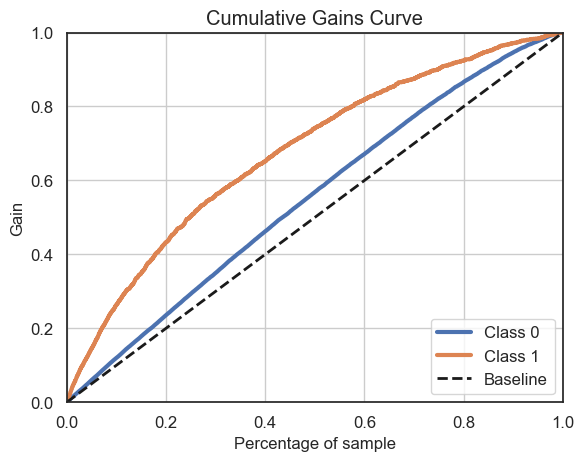

In [243]:
# plot Cumulative Gains Curve for Random Forest model on test data

skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba_rf_full)
plt.show()

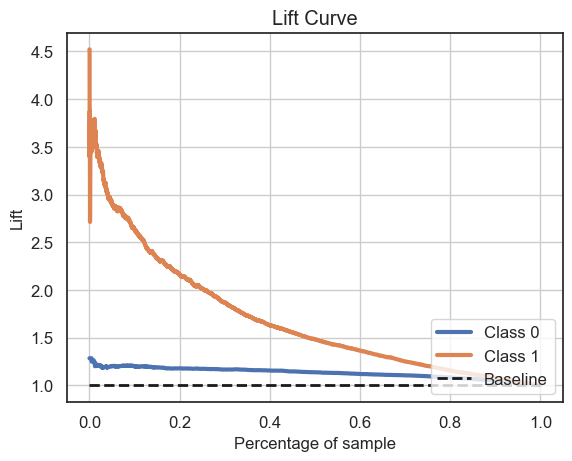

In [244]:
# plot Cumulative Lift Curve for Random Forest model on test data

skplt.metrics.plot_lift_curve(y_test, y_pred_proba_rf_full)
plt.show()

### 7.5 Gradient Boosting Model

In [200]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_norm_sm, y_train_sm)

GradientBoostingClassifier()

In [201]:
print('Gradient Boosting model performance on training data :')
gb_perf_train = performance_on_train(gb_model, X_train_norm_sm, y_train_sm)

Gradient Boosting model performance on training data :
Train Confusion Matrix:
 [[12952  4571]
 [ 2970 14553]]
Train Accuracy:  0.7848256577070136
Train Precision:  0.8134656450194699
Train Recall:  0.739142840837756
Train F1 Score:  0.7745253401106293
Train AUC:  0.8682187530321266


In [202]:
print('Gradient Boosting model performance on test data :')
gb_perf_test = performance_on_test(gb_model, X_test2_norm, y_test)

Gradient Boosting model performance on test data :
Test Confusion Matrix:
 [[ 915  744]
 [1032 4809]]
Test Accuracy:  0.7632
Test Precision:  0.4699537750385208
Test Recall:  0.5515370705244123
Test F1 Score:  0.5074875207986689
Test AUC:  0.7588050899572032


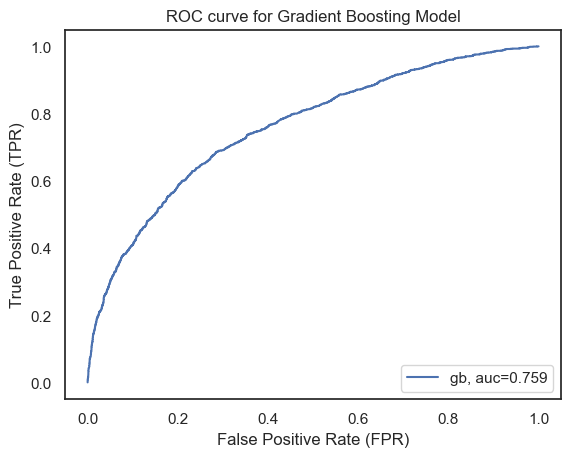

In [205]:
# plot roc curve for Gradient Boosting model on test data 

y_pred_proba_gb = gb_model.predict_proba(X_test2_norm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_gb)
auc_gb = metrics.roc_auc_score(y_test, y_pred_proba_gb)

plt.plot(fpr, tpr, label="gb, auc="+str("{:.3f}".format(auc_gb)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve for Gradient Boosting Model')
plt.show()

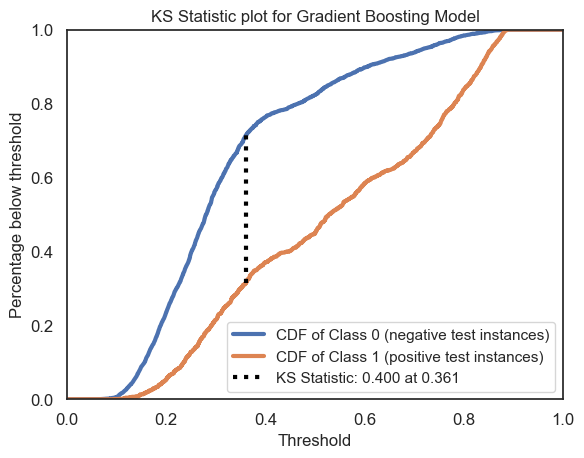

In [245]:
# plot ks statistic plot for Gradient Boosting model on test data 

y_pred_proba_gb_full = gb_model.predict_proba(X_test2_norm)
skplt.metrics.plot_ks_statistic(y_test, y_pred_proba_gb_full)
plt.title('KS Statistic plot for Gradient Boosting Model')
L=plt.legend()
L.get_texts()[0].set_text('CDF of Class 0 (negative test instances)')
L.get_texts()[1].set_text('CDF of Class 1 (positive test instances)')
plt.show()

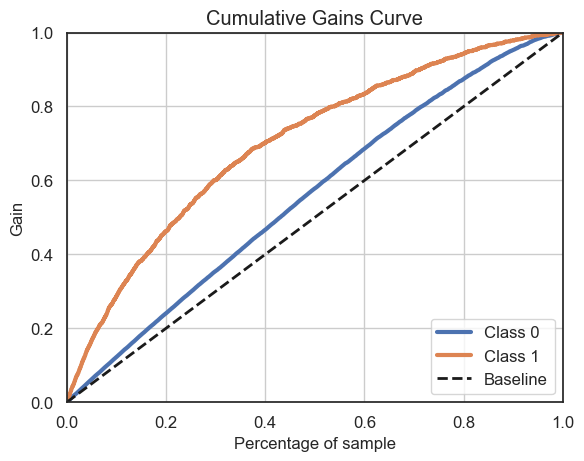

In [247]:
# plot Cumulative Gains Curve for Gradient Boosting model on test data

skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba_gb_full)
plt.show()

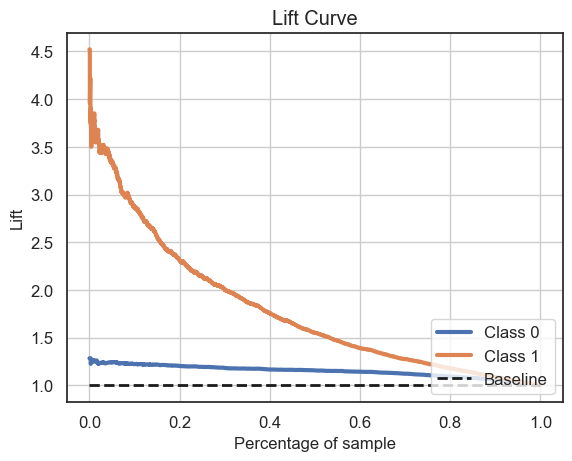

In [248]:
# plot Cumulative Lift Curve for Gradient Boosting model on test data

skplt.metrics.plot_lift_curve(y_test, y_pred_proba_gb_full)
plt.show()

### 7.6 K-Nearest Neighbors Model 

In [207]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_norm_sm, y_train_sm)

KNeighborsClassifier()

In [208]:
print('KNN model performance on training data :')
knn_perf_train = performance_on_train(knn_model, X_train_norm_sm, y_train_sm)

KNN model performance on training data :
Train Confusion Matrix:
 [[16311  1212]
 [ 3866 13657]]
Train Accuracy:  0.8551047195114991
Train Precision:  0.8083956980720622
Train Recall:  0.9308337613422359
Train F1 Score:  0.8653050397877985
Train AUC:  0.9458430286073761


In [209]:
print('KNN model performance on test data :')
knn_perf_test = performance_on_test(knn_model, X_test2_norm, y_test)

KNN model performance on test data :
Test Confusion Matrix:
 [[ 925  734]
 [1840 4001]]
Test Accuracy:  0.6568
Test Precision:  0.3345388788426763
Test Recall:  0.5575647980711271
Test F1 Score:  0.4181735985533454
Test AUC:  0.6585741251049124


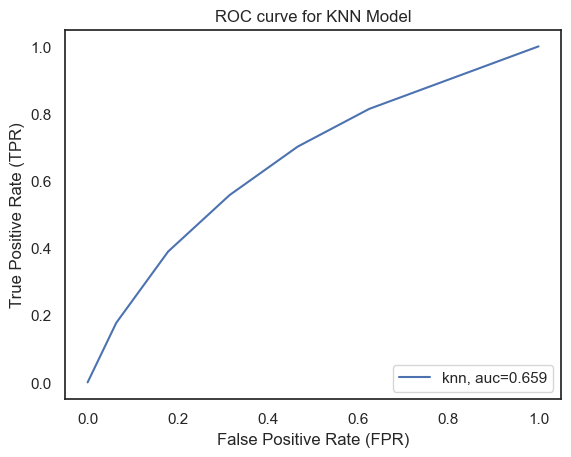

In [210]:
# plot roc curve for KNN model on test data 

y_pred_proba_knn = knn_model.predict_proba(X_test2_norm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_knn)
auc_knn = metrics.roc_auc_score(y_test, y_pred_proba_knn)

plt.plot(fpr, tpr, label="knn, auc="+str("{:.3f}".format(auc_knn)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve for KNN Model')
plt.show()

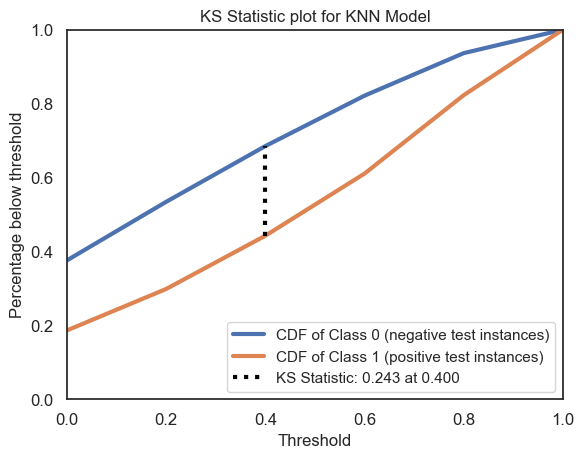

In [249]:
# plot ks statistic plot for KNN model on test data 

y_pred_proba_knn_full = knn_model.predict_proba(X_test2_norm)
skplt.metrics.plot_ks_statistic(y_test, y_pred_proba_knn_full)
plt.title('KS Statistic plot for KNN Model')
L=plt.legend()
L.get_texts()[0].set_text('CDF of Class 0 (negative test instances)')
L.get_texts()[1].set_text('CDF of Class 1 (positive test instances)')
plt.show()

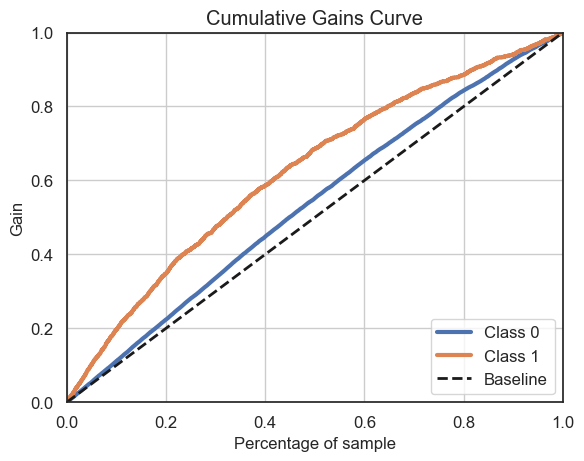

In [250]:
# plot Cumulative Gains Curve for KNN model on test data

skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba_knn_full)
plt.show()

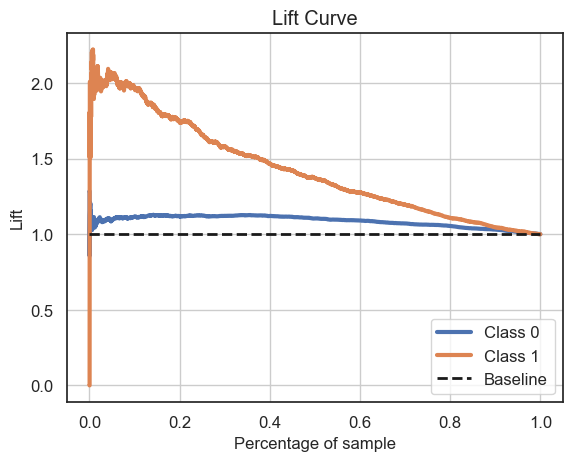

In [251]:
# plot Cumulative Lift Curve for KNN model on test data

skplt.metrics.plot_lift_curve(y_test, y_pred_proba_knn_full)
plt.show()

## 8. Model Evaluation

In [212]:
performance_table_train = pd.DataFrame()

performance_table_train = performance_table_train.append(logreg_perf_train, ignore_index=True)
performance_table_train = performance_table_train.append(svm_perf_train, ignore_index=True)
performance_table_train = performance_table_train.append(rf_perf_train, ignore_index=True)
performance_table_train = performance_table_train.append(gb_perf_train, ignore_index=True)
performance_table_train = performance_table_train.append(knn_perf_train, ignore_index=True)

performance_table_train = performance_table_train.rename(index={0: 'Logistic Regression', 
                                                                1: "SVM", 
                                                                2: "Random Forest",
                                                                3: 'Gradient Boosting', 
                                                                4: 'KNN'})
print('Model Performance on Training Data :')
print(performance_table_train)

Model Performance on Training Data :
                     Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  0.693460   0.776149  0.543743  0.639485  0.754871
SVM                  0.664527   0.802518  0.436455  0.565409  0.757143
Random Forest        0.999686   0.999715  0.999658  0.999686  0.999990
Gradient Boosting    0.784826   0.813466  0.739143  0.774525  0.868219
KNN                  0.855105   0.808396  0.930834  0.865305  0.945843


In [213]:
performance_table_test = pd.DataFrame()

performance_table_test = performance_table_test.append(logreg_perf_test, ignore_index=True)
performance_table_test = performance_table_test.append(svm_perf_test, ignore_index=True)
performance_table_test = performance_table_test.append(rf_perf_test, ignore_index=True)
performance_table_test = performance_table_test.append(gb_perf_test, ignore_index=True)
performance_table_test = performance_table_test.append(knn_perf_test, ignore_index=True)

performance_table_test = performance_table_test.rename(index={0: 'Logistic Regression', 
                                                                1: "SVM", 
                                                                2: "Random Forest",
                                                                3: 'Gradient Boosting', 
                                                                4: 'KNN'})
print('Model Performance on Test Data :')
print(performance_table_test)

Model Performance on Test Data :
                     Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  0.766000   0.473684  0.520796  0.496124  0.736155
SVM                  0.788000   0.525424  0.429777  0.472812  0.727527
Random Forest        0.758533   0.455916  0.473779  0.464676  0.726885
Gradient Boosting    0.763200   0.469954  0.551537  0.507488  0.758805
KNN                  0.656800   0.334539  0.557565  0.418174  0.658574


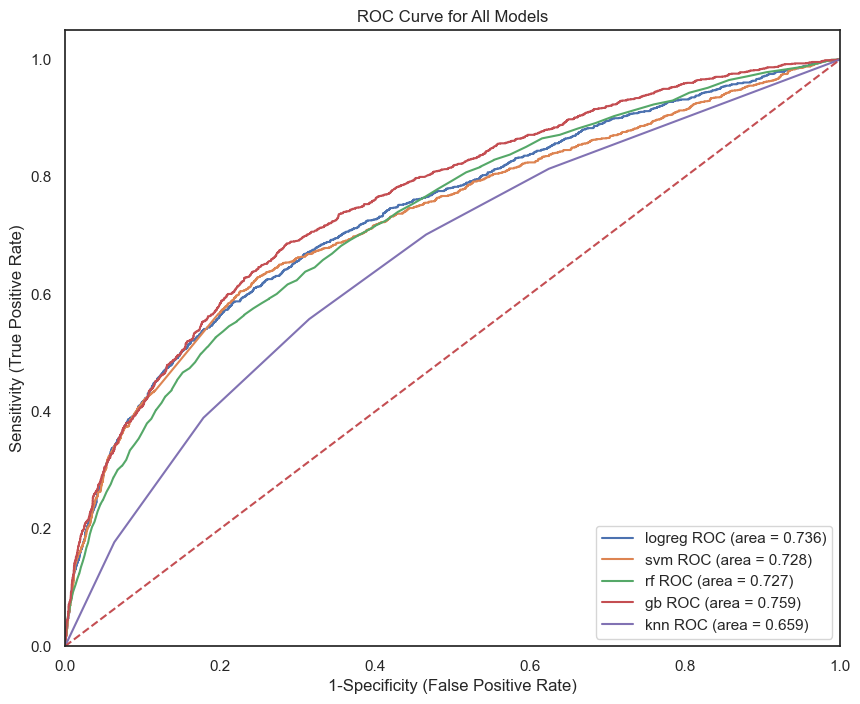

In [214]:
# plot combined ROC curves for all models 

y_pred_proba_logreg = logreg_model.predict_proba(X_test2_norm)[:, 1]
y_pred_proba_svm = svm_model.predict_proba(X_test2_norm)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test2_norm)[:, 1]
y_pred_proba_gb = gb_model.predict_proba(X_test2_norm)[:, 1]
y_pred_proba_knn = knn_model.predict_proba(X_test2_norm)[:, 1]

probas = [y_pred_proba_logreg, y_pred_proba_svm, y_pred_proba_rf, y_pred_proba_gb, y_pred_proba_knn]
labels = ['logreg', 'svm', 'rf', 'gb', 'knn']

plt.figure(figsize=(10, 8))
m=np.arange(5)

for i in m : 
    fpr, tpr, _ = metrics.roc_curve(y_test, probas[i])
    auc = metrics.roc_auc_score(y_test, probas[i])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (labels[i], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('ROC Curve for All Models')
plt.legend(loc="lower right")
plt.show()